<a href="https://colab.research.google.com/github/rubeshajith/Classification-Project/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.
# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.
#Data Description
Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not 

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium 
cost), 2(high cost) and 3(very high cost).

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/data/project/Mobile Price Range Prediction/data_mobile_price_range.csv')

In [5]:
# To display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Displaying first 5 rows
df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1

In [7]:
# Getting the shape of the dataset
df.shape

(2000, 21)

In [8]:
# Renaming columns
df.rename(columns = {'blue':'bluetooth', 'fc':'front_cam_pix','m_dep':'mobile_depth','pc':'rear_cam_pix','sc_h':'screen_height','sc_w':'screen_width'}, inplace = True)

In [9]:
df.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_cam_pix  \
count    2000.000000  2000.0000  2000.000000  2000.000000    2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500       4.309500   
std       439.418206     0.5001     0.816004     0.500035       4.341444   
min       501.000000     0.0000     0.500000     0.000000       0.000000   
25%       851.750000     0.0000     0.700000     0.000000       1.000000   
50%      1226.000000     0.0000     1.500000     1.000000       3.000000   
75%      1615.250000     1.0000     2.200000     1.000000       7.000000   
max      1998.000000     1.0000     3.000000     1.000000      19.000000   

            four_g   int_memory  mobile_depth    mobile_wt      n_cores  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500      0.501750   140.249000     4.520500   
std       0.499662    18.145715      0.288416    35.399655     2.287837   
min       0.000000     2.000000      0.100000    80.000000     1.000000   
25%       0.000000    16.000000      0.200000   109.000000     3.000000   
50%       1.000000    32.000000      0.500000   141.000000     4.000000   
75%       1.000000    48.000000      0.800000   170.000000     7.000000   
max       1.000000    64.000000      1.000000   200.000000     8.000000   

       rear_cam_pix    px_height     px_width          ram  screen_height  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean       9.916500   645.108000  1251.515500  2124.213000      12.306500   
std        6.064315   443.780811   432.199447  1084.732044       4.213245   
min        0.000000     0.000000   500.000000   256.000000       5.000000   
25%        5.000000   282.750000   874.750000  1207.500000       9.000000   
50%       10.000000   564.000000  1247.000000  2146.500000      12.000000   
75%       15.000000   947.250000  1633.000000  3064.500000      16.000000   
max       20.000000  1960.000000  1998.000000  3998.000000      19.000000   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

In [10]:
# Information on null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   bluetooth      2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   front_cam_pix  2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   mobile_depth   2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  rear_cam_pix   2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  screen_height  2000 non-null   int64  
 15  screen_width   2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
# Checking for null values
df.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
front_cam_pix    0
four_g           0
int_memory       0
mobile_depth     0
mobile_wt        0
n_cores          0
rear_cam_pix     0
px_height        0
px_width         0
ram              0
screen_height    0
screen_width     0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

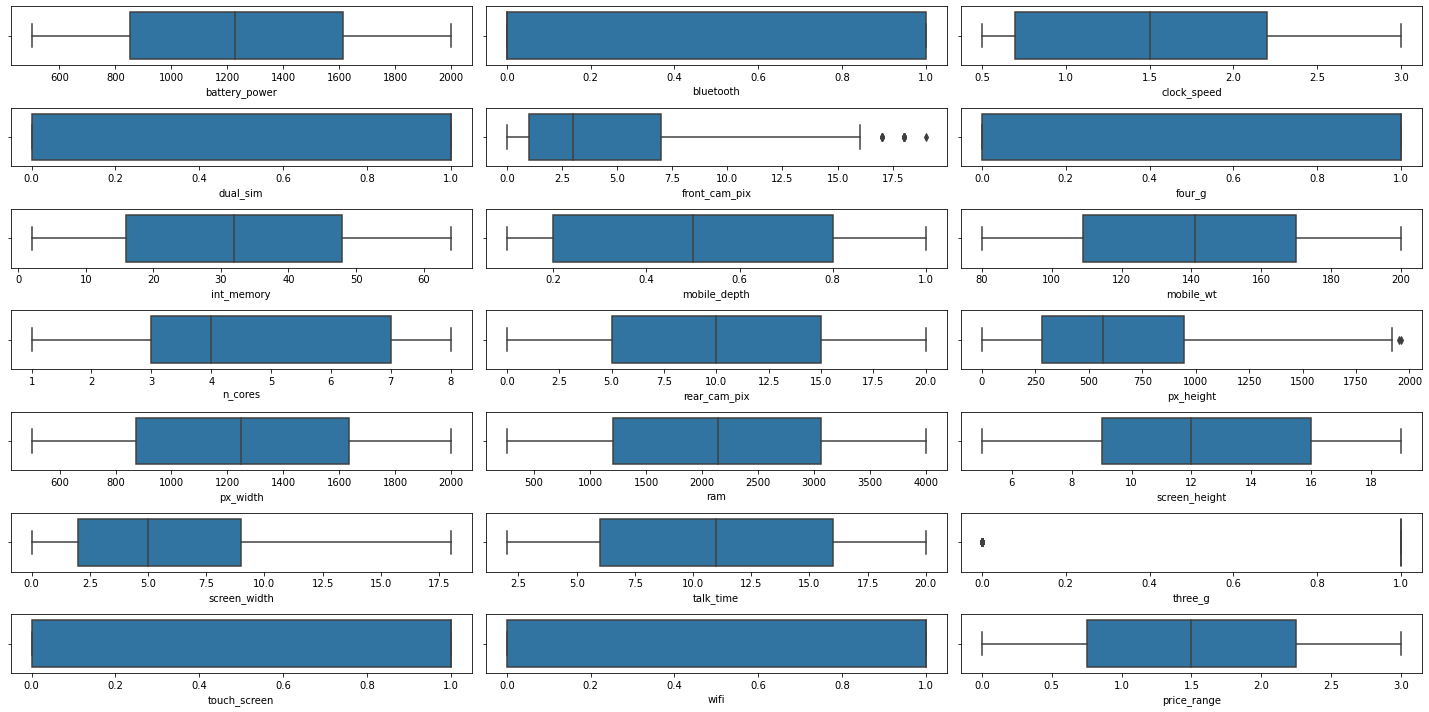

In [12]:
plt.figure(figsize = (20, 10))
x = 1
for column in df.columns :
    plt.subplot(7, 3, x)
    sns.boxplot(df[column])
    x = x+1
plt.tight_layout()

In [13]:
df.front_cam_pix.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_cam_pix, dtype: int64

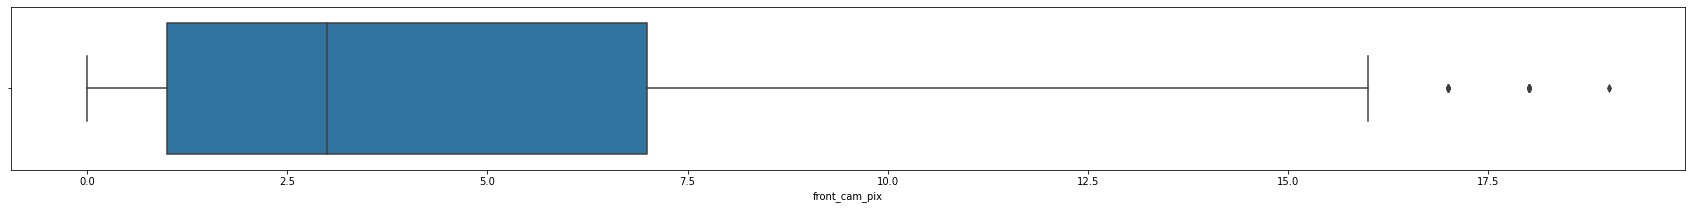

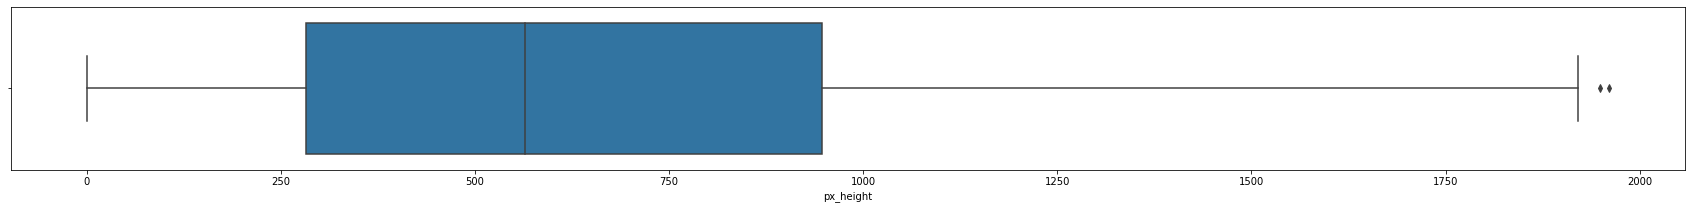

In [14]:
# plotting seperate box_plots which detected outliers
plt.figure(figsize = (30,3))
sns.boxplot(df.front_cam_pix)
plt.figure(figsize = (30,3))
sns.boxplot(df.px_height)


In [15]:
df.front_cam_pix.value_counts(ascending= True).loc[lambda x :x <= 11].to_frame()

front_cam_pix
19              1
17              6
18             11

In [16]:
df.px_height.sort_values(ascending= False)[:2].to_frame()

px_height
1771       1960
988        1949

Above printed dataframes are the outliers which were detected by box_plot. i.e, Front camerea pixels with 19MP has count of one, 17MP has count of six and 18MP with eleven counts so total of 18 rows 

Pixel height have two outlier which were detected by boxplot 

So 20 outlier rows which is nearly 1% of data in our datset 

We're implementing Lostic Regression too and they follows similar assumptions of Linear Regression

Logistic Regression suffers of extreme outliers, We aren't removing this outliers, they are not extreme to do so.

In [17]:
# Interpreting our DataFrame Statistically
df.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_cam_pix  \
count    2000.000000  2000.0000  2000.000000  2000.000000    2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500       4.309500   
std       439.418206     0.5001     0.816004     0.500035       4.341444   
min       501.000000     0.0000     0.500000     0.000000       0.000000   
25%       851.750000     0.0000     0.700000     0.000000       1.000000   
50%      1226.000000     0.0000     1.500000     1.000000       3.000000   
75%      1615.250000     1.0000     2.200000     1.000000       7.000000   
max      1998.000000     1.0000     3.000000     1.000000      19.000000   

            four_g   int_memory  mobile_depth    mobile_wt      n_cores  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500      0.501750   140.249000     4.520500   
std       0.499662    18.145715      0.288416    35.399655     2.287837   
min       0.000000     2.000000      0.100000    80.000000     1.000000   
25%       0.000000    16.000000      0.200000   109.000000     3.000000   
50%       1.000000    32.000000      0.500000   141.000000     4.000000   
75%       1.000000    48.000000      0.800000   170.000000     7.000000   
max       1.000000    64.000000      1.000000   200.000000     8.000000   

       rear_cam_pix    px_height     px_width          ram  screen_height  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean       9.916500   645.108000  1251.515500  2124.213000      12.306500   
std        6.064315   443.780811   432.199447  1084.732044       4.213245   
min        0.000000     0.000000   500.000000   256.000000       5.000000   
25%        5.000000   282.750000   874.750000  1207.500000       9.000000   
50%       10.000000   564.000000  1247.000000  2146.500000      12.000000   
75%       15.000000   947.250000  1633.000000  3064.500000      16.000000   
max       20.000000  1960.000000  1998.000000  3998.000000      19.000000   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       5.767000    11.011000     0.761500      0.503000     0.507000   
std        4.356398     5.463955     0.426273      0.500116     0.500076   
min        0.000000     2.000000     0.000000      0.000000     0.000000   
25%        2.000000     6.000000     1.000000      0.000000     0.000000   
50%        5.000000    11.000000     1.000000      1.000000     1.000000   
75%        9.000000    16.000000     1.000000      1.000000     1.000000   
max       18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

From the above describe method we can see variables with have 0 values which is unlikely for few columns namely pixel_height and screen_width.

In [18]:
df[df.px_height == 0]

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
1481           1834          0          2.1         0              7       1   
1933            897          1          2.0         0              3       1   

      int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
1481          40           0.1         99        4            11          0   
1933           2           0.6        154        8            10          0   

      px_width   ram  screen_height  screen_width  talk_time  three_g  \
1481      1987  3692             13             0         16        1   
1933       994  1958              7             5          7        1   

      touch_screen  wifi  price_range  
1481             1     0            3  
1933             1     0            1

Since they are continous variables, and also similar pixel width doesn't have similar pixel height so we're replacing zero values to there means with respect to price classes

In [19]:
pr_count_pxh = df.price_range[df['px_height'] == 0].value_counts().to_frame(name="Count_of_zeros").sort_index()
# pr_count_pxh.columns = ["price_range","count_of_zeros"]
pr_count_pxh.index.name = "price_range"
pr_count_pxh

Count_of_zeros
price_range                
1                         1
3                         1

In [20]:
price_ph_mean = np.ceil(df.groupby("price_range")["px_height"].mean())
price_ph_mean.to_frame(name="px_height_mean")

px_height_mean
price_range                
0                     537.0
1                     667.0
2                     633.0
3                     745.0

In [21]:
df["px_height"] = df["px_height"].replace(0, np.nan)

In [22]:
df["px_height"] = df["px_height"].fillna(np.ceil(df.groupby("price_range")["px_height"].transform("mean")))

In [23]:
pr_count_sw = df.price_range[df['screen_width'] == 0].value_counts().to_frame(name="Count_of_zeros").sort_index()
# pr_count_sw.columns = ["price_range","count_of_zeros"]
pr_count_sw.index.name = "price_range"
pr_count_sw

Count_of_zeros
price_range                
0                        49
1                        48
2                        44
3                        39

In [24]:
price_sw_mean = np.ceil(df.groupby("price_range")["screen_width"].mean())
price_sw_mean.to_frame(name="screen_width_mean")

screen_width_mean
price_range                   
0                          6.0
1                          6.0
2                          6.0
3                          7.0

In [25]:
df["screen_width"] = df["screen_width"].replace(0, np.nan)

In [26]:
df["screen_width"] = df["screen_width"].fillna(np.ceil(df.groupby("price_range")["screen_width"].transform("mean")))

In [27]:
# 1 inch is equal to 2.54 cm :
df["screen_height"] = df["screen_height"]/2.54
df["screen_width"] = df["screen_width"]/2.54


In [28]:
# converting cm to mm for mobile depth colmn
df["mobile_depth"] = df["mobile_depth"]*10


In [29]:
df.describe()

battery_power  bluetooth  clock_speed     dual_sim  front_cam_pix  \
count    2000.000000  2000.0000  2000.000000  2000.000000    2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500       4.309500   
std       439.418206     0.5001     0.816004     0.500035       4.341444   
min       501.000000     0.0000     0.500000     0.000000       0.000000   
25%       851.750000     0.0000     0.700000     0.000000       1.000000   
50%      1226.000000     0.0000     1.500000     1.000000       3.000000   
75%      1615.250000     1.0000     2.200000     1.000000       7.000000   
max      1998.000000     1.0000     3.000000     1.000000      19.000000   

            four_g   int_memory  mobile_depth    mobile_wt      n_cores  \
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500      5.017500   140.249000     4.520500   
std       0.499662    18.145715      2.884155    35.399655     2.287837   
min       0.000000     2.000000      1.000000    80.000000     1.000000   
25%       0.000000    16.000000      2.000000   109.000000     3.000000   
50%       1.000000    32.000000      5.000000   141.000000     4.000000   
75%       1.000000    48.000000      8.000000   170.000000     7.000000   
max       1.000000    64.000000     10.000000   200.000000     8.000000   

       rear_cam_pix    px_height     px_width          ram  screen_height  \
count   2000.000000  2000.000000  2000.000000  2000.000000    2000.000000   
mean       9.916500   645.816000  1251.515500  2124.213000       4.845079   
std        6.064315   443.317057   432.199447  1084.732044       1.658758   
min        0.000000     1.000000   500.000000   256.000000       1.968504   
25%        5.000000   284.000000   874.750000  1207.500000       3.543307   
50%       10.000000   568.000000  1247.000000  2146.500000       4.724409   
75%       15.000000   947.250000  1633.000000  3064.500000       6.299213   
max       20.000000  1960.000000  1998.000000  3998.000000       7.480315   

       screen_width    talk_time      three_g  touch_screen         wifi  \
count   2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean       2.518504    11.011000     0.761500      0.503000     0.507000   
std        1.561124     5.463955     0.426273      0.500116     0.500076   
min        0.393701     2.000000     0.000000      0.000000     0.000000   
25%        1.181102     6.000000     1.000000      0.000000     0.000000   
50%        2.362205    11.000000     1.000000      1.000000     1.000000   
75%        3.543307    16.000000     1.000000      1.000000     1.000000   
max        7.086614    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      1.500000  
std       1.118314  
min       0.000000  
25%       0.750000  
50%       1.500000  
75%       2.250000  
max       3.000000

### Feature Extraction

In [30]:
# front cam
df.loc[df["front_cam_pix"] ==0, "has_front_cam"] = 0
df.loc[df["front_cam_pix"] >0, "has_front_cam"] = 1
df["has_front_cam"] = df["has_front_cam"].astype(int)

In [31]:
# rear cam craetion
df.loc[df["rear_cam_pix"] ==0, "has_rear_cam"] = 0
df.loc[df["rear_cam_pix"] >0, "has_rear_cam"] = 1


Mobiles without rear camera doesn't have front cameras too, So we're not creating column which contains both camera.

In [32]:
df['has_front_cam'].value_counts()

1    1526
0     474
Name: has_front_cam, dtype: int64

In [33]:
df['has_rear_cam'].value_counts()

1.0    1899
0.0     101
Name: has_rear_cam, dtype: int64

In [34]:
df.loc[(df['front_cam_pix'] ==0) & (df['rear_cam_pix'] ==0)].shape

(101, 23)

In [35]:
df.loc[(df['px_width'] < 1280) | (df['px_height'] < 720), 'hd_quality'] = 0
df['hd_quality'] = df['hd_quality'].fillna(1)

In [36]:
df["hd_quality"].value_counts()

0.0    1437
1.0     563
Name: hd_quality, dtype: int64

In [37]:
# screen size creation with pythagoras theorem (hypotenuse = np.sqrt(a^2+b^2) a,b is height and width)
df["screen_size"] = np.sqrt(df["screen_height"]**2 +df["screen_width"]**2).round(1)

In [38]:
df["pixel_per_inch"] = ((np.sqrt(df["px_height"]**2 +df["px_width"]**2)) / df["screen_size"]).round(1)

In [39]:
bin_ram_size = [256, 512, 1000, 2000, 3000, 4000]
label_ram = ['256 to 512 MB', '512 MB to 1GB', '1 to 2 GB', '2 to 3 GB', '3 to 4 GB']

df['ram_size'] = pd.cut(df['ram'], bins = bin_ram_size, labels = label_ram)

df['ram_size'].value_counts()

2 to 3 GB        556
3 to 4 GB        524
1 to 2 GB        522
512 MB to 1GB    255
256 to 512 MB    142
Name: ram_size, dtype: int64

In [40]:
ram_df = df["ram_size"].value_counts(ascending=True).to_frame(name="Counts")
ram_df.index.name = "approx_ramsize_in_gb"
ram_df

Counts
approx_ramsize_in_gb        
256 to 512 MB            142
512 MB to 1GB            255
1 to 2 GB                522
3 to 4 GB                524
2 to 3 GB                556

In [41]:
df["mobile_depth"].value_counts(bins=2)

(0.99, 5.5]    1105
(5.5, 10.0]     895
Name: mobile_depth, dtype: int64

In [42]:
df.loc[(df['mobile_depth'] <= 7 ) & (df['mobile_wt'] < 155)& (df['touch_screen']== 1), 'slim_and_light_weight_touch_mob'] = 1
df['slim_and_light_weight_touch_mob'] = df['slim_and_light_weight_touch_mob'].fillna(0)

In [43]:
df.slim_and_light_weight_touch_mob.value_counts().to_frame(name="counts")

counts
0.0    1528
1.0     472

In [44]:
df.clock_speed.value_counts()

0.5    413
2.8     85
2.3     78
2.1     76
1.6     76
2.5     74
0.6     74
1.4     70
1.3     68
1.5     67
2.0     67
1.9     65
0.7     64
2.9     62
1.8     62
1.0     61
1.7     60
2.2     59
0.9     58
2.4     58
0.8     58
1.2     56
2.6     55
2.7     55
1.1     51
3.0     28
Name: clock_speed, dtype: int64

In [45]:
clock_speed_bin = [0, 1.0,1.5,2.0,2.5,3.0]
clock_bin_label = ['upto 1GHz', 'upto 1.5GHz', 'upto 2GHz', 'upto 2.5GHz', 'upto 3.0GHz']

df['speed'] = pd.cut(df['clock_speed'], bins = clock_speed_bin, labels = clock_bin_label)

df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
0            842          0          2.2         0              1       0   
1           1021          1          0.5         1              0       1   
2            563          1          0.5         1              2       1   
3            615          1          2.5         0              0       0   
4           1821          1          1.2         0             13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
0           7           6.0        188        2             2       20.0   
1          53           7.0        136        3             6      905.0   
2          41           9.0        145        5             6     1263.0   
3          10           8.0        131        6             9     1216.0   
4          44           6.0        141        2            14     1208.0   

   px_width   ram  screen_height  screen_width  talk_time  three_g  \
0       756  2549       3.543307      2.755906         19        0   
1      1988  2631       6.692913      1.181102          7        1   
2      1716  2603       4.330709      0.787402          9        1   
3      1786  2769       6.299213      3.149606         11        1   
4      1212  1411       3.149606      0.787402         15        1   

   touch_screen  wifi  price_range  has_front_cam  has_rear_cam  hd_quality  \
0             0     1            1              1           1.0         0.0   
1             1     0            2              0           1.0         1.0   
2             1     0            2              1           1.0         1.0   
3             0     0            2              0           1.0         1.0   
4             1     0            1              1           1.0         0.0   

   screen_size  pixel_per_inch   ram_size  slim_and_light_weight_touch_mob  \
0          4.5           168.1  2 to 3 GB                              0.0   
1          6.8           321.2  2 to 3 GB                              1.0   
2          4.4           484.2  2 to 3 GB                              0.0   
3          7.0           308.7  2 to 3 GB                              0.0   
4          3.2           534.8  1 to 2 GB                              1.0   

         speed  
0  upto 2.5GHz  
1    upto 1GHz  
2    upto 1GHz  
3  upto 2.5GHz  
4  upto 1.5GHz

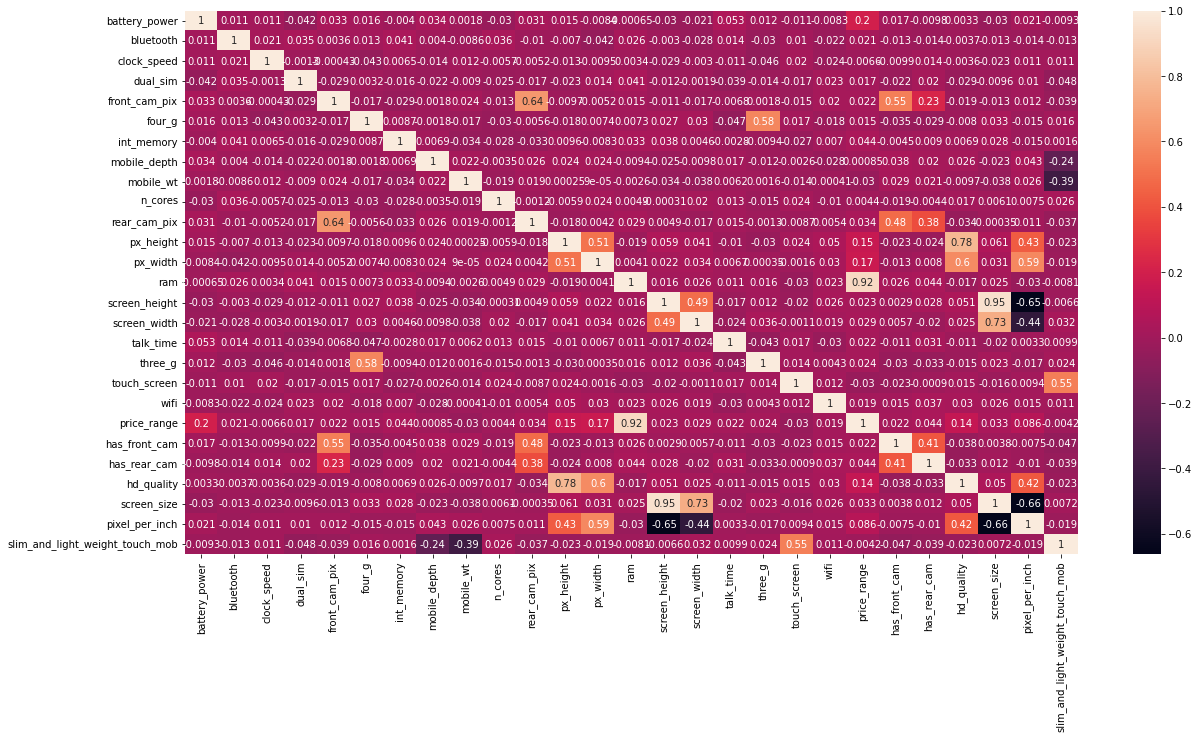

In [46]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)

In [47]:
sns.color_palette("crest", as_cmap=True)


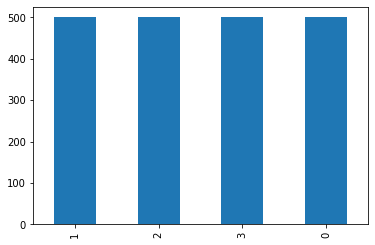

In [48]:
df["price_range"].value_counts().plot(kind="bar")

In [49]:
newly_created_binary_var = ["has_front_cam","has_rear_cam","hd_quality","slim_and_light_weight_touch_mob"]
for variable in newly_created_binary_var:
  df[variable] = df[variable].astype(int)

In [50]:
binary_features = ["bluetooth","dual_sim","four_g","three_g","touch_screen","wifi","has_front_cam","has_rear_cam",
            "hd_quality","slim_and_light_weight_touch_mob"]                

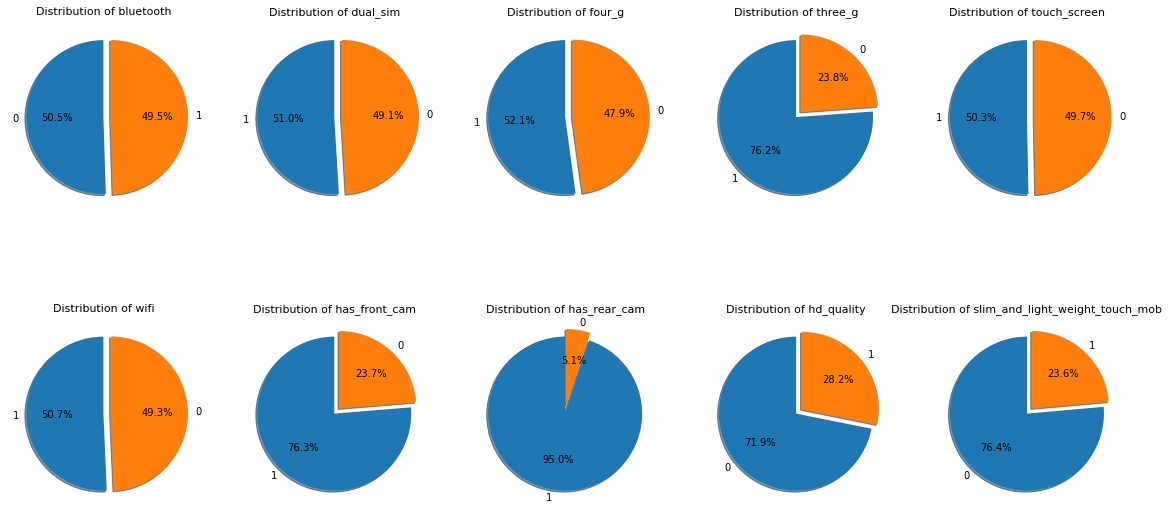

In [51]:
plt.figure(figsize=(20,10))
count = 0

for feature in binary_features:
    myexplode = [0, 0.1]
    
    labels = df[feature].value_counts().index
    sizes = df[feature].value_counts().values  
    
    plt.subplot(2,5,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, autopct='%1.1f%%')
    plt.title(f'Distribution of {binary_features[count]}', color = 'black',fontsize = 11)
    count += 1

In [52]:
df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
0            842          0          2.2         0              1       0   
1           1021          1          0.5         1              0       1   
2            563          1          0.5         1              2       1   
3            615          1          2.5         0              0       0   
4           1821          1          1.2         0             13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
0           7           6.0        188        2             2       20.0   
1          53           7.0        136        3             6      905.0   
2          41           9.0        145        5             6     1263.0   
3          10           8.0        131        6             9     1216.0   
4          44           6.0        141        2            14     1208.0   

   px_width   ram  screen_height  screen_width  talk_time  three_g  \
0       756  2549       3.543307      2.755906         19        0   
1      1988  2631       6.692913      1.181102          7        1   
2      1716  2603       4.330709      0.787402          9        1   
3      1786  2769       6.299213      3.149606         11        1   
4      1212  1411       3.149606      0.787402         15        1   

   touch_screen  wifi  price_range  has_front_cam  has_rear_cam  hd_quality  \
0             0     1            1              1             1           0   
1             1     0            2              0             1           1   
2             1     0            2              1             1           1   
3             0     0            2              0             1           1   
4             1     0            1              1             1           0   

   screen_size  pixel_per_inch   ram_size  slim_and_light_weight_touch_mob  \
0          4.5           168.1  2 to 3 GB                                0   
1          6.8           321.2  2 to 3 GB                                1   
2          4.4           484.2  2 to 3 GB                                0   
3          7.0           308.7  2 to 3 GB                                0   
4          3.2           534.8  1 to 2 GB                                1   

         speed  
0  upto 2.5GHz  
1    upto 1GHz  
2    upto 1GHz  
3  upto 2.5GHz  
4  upto 1.5GHz

In [53]:
df.n_cores.value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

Text(0.5, 1.0, 'screen_size distribution')

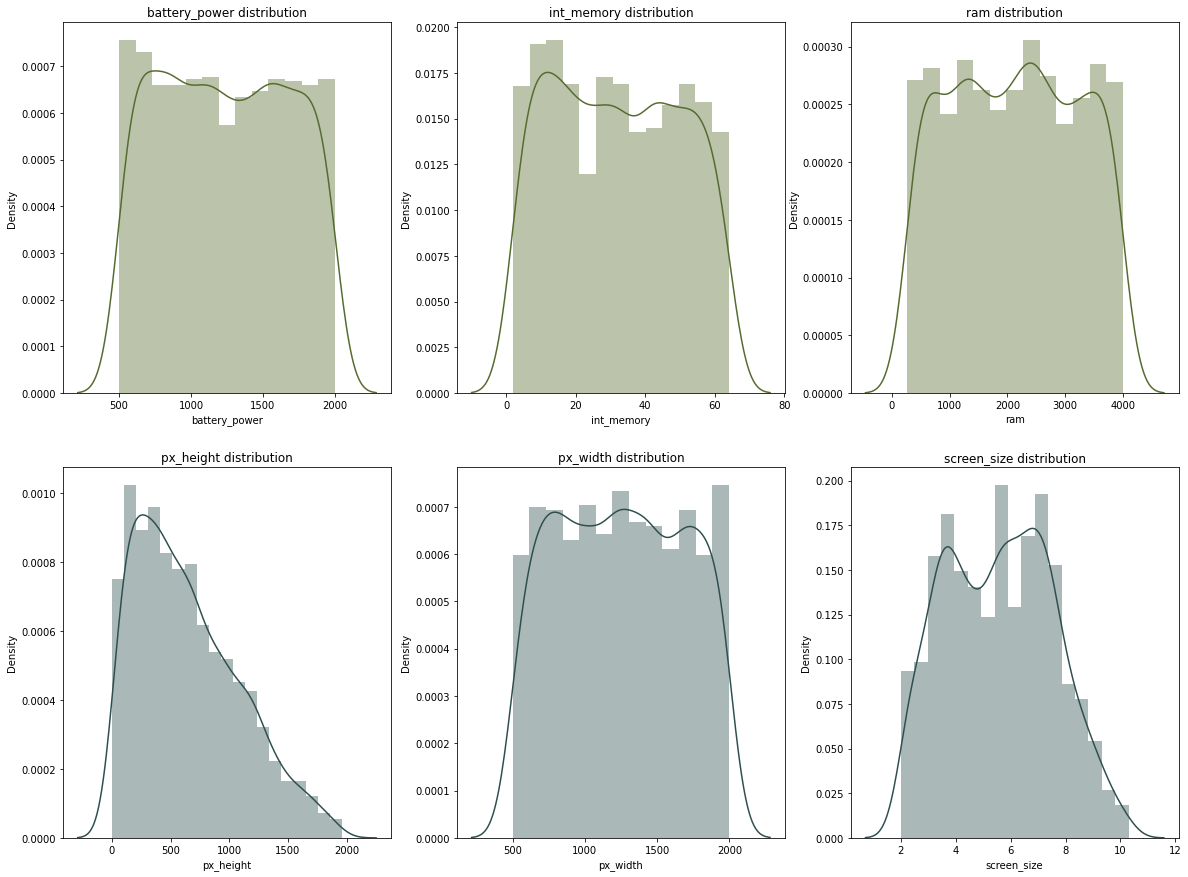

In [54]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.distplot(df['battery_power'], color="darkolivegreen").set_title('battery_power distribution')
plt.subplot(2,3,2)
sns.distplot(df['int_memory'], color="darkolivegreen").set_title('int_memory distribution')
plt.subplot(2,3,3)
sns.distplot(df['ram'], color="darkolivegreen").set_title('ram distribution')
plt.subplot(2,3,4)
sns.distplot(df['px_height'], color="darkslategrey").set_title('px_height distribution')
plt.subplot(2,3,5)
sns.distplot(df['px_width'], color="darkslategrey").set_title('px_width distribution')
plt.subplot(2,3,6)
sns.distplot(df['screen_size'], color="darkslategrey").set_title('screen_size distribution')

In [55]:
df.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_cam_pix', 'four_g', 'int_memory', 'mobile_depth', 'mobile_wt',
       'n_cores', 'rear_cam_pix', 'px_height', 'px_width', 'ram',
       'screen_height', 'screen_width', 'talk_time', 'three_g', 'touch_screen',
       'wifi', 'price_range', 'has_front_cam', 'has_rear_cam', 'hd_quality',
       'screen_size', 'pixel_per_inch', 'ram_size',
       'slim_and_light_weight_touch_mob', 'speed'],
      dtype='object')

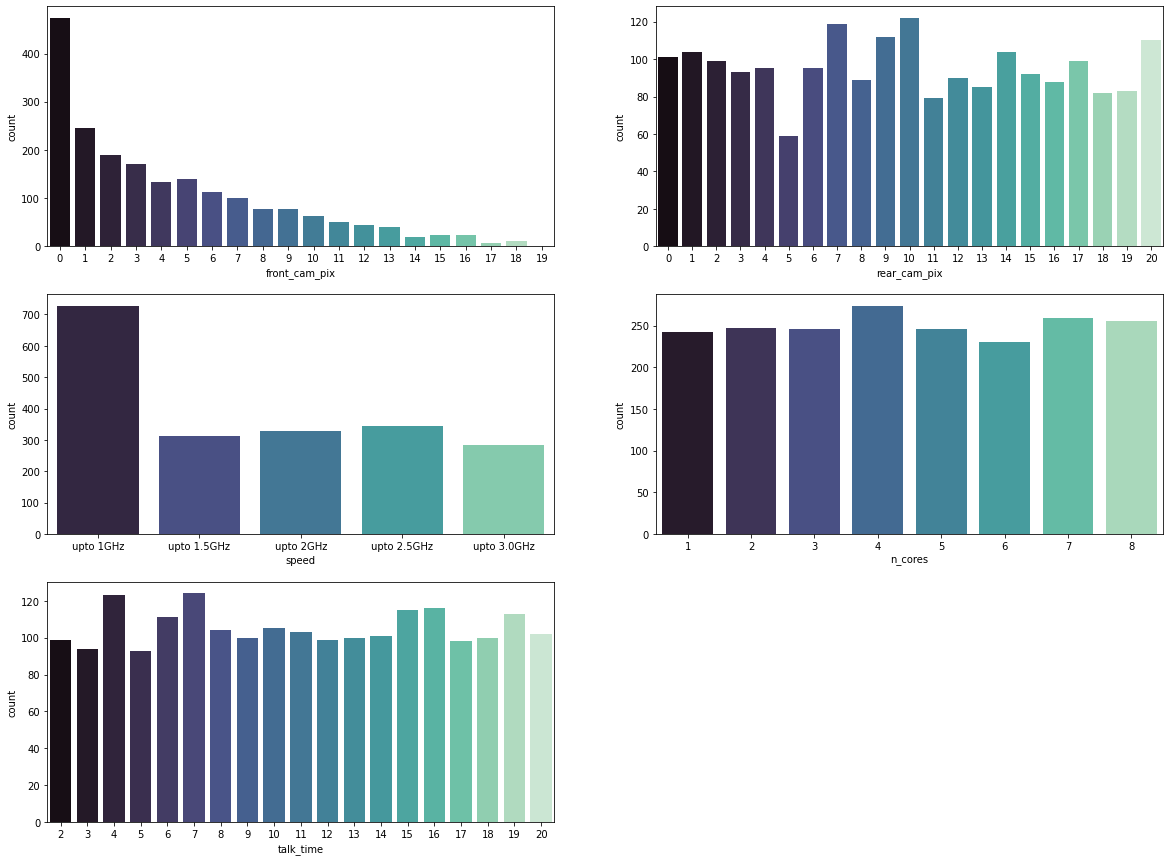

In [56]:
distinct_features = ["front_cam_pix","rear_cam_pix","speed","n_cores","talk_time"]
plt.figure(figsize=(20,15))
count = 0
for feature in distinct_features:
  plt.subplot(3,2,count+1)
  sns.countplot(df[feature], palette = 'mako')
  count += 1

Bivariate Analysis

Text(0.5, 1.0, 'RAM distribution of price range 3')

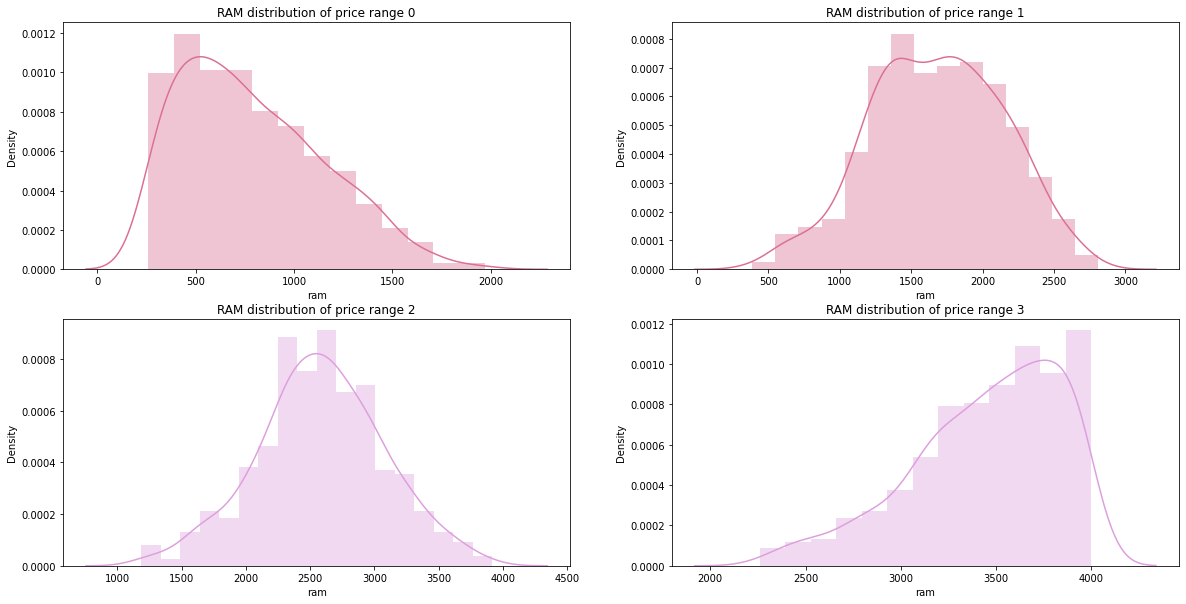

In [57]:
df_price_0 = df[df['price_range']==0]
df_price_1 = df[df['price_range']==1]
df_price_2 = df[df['price_range']==2]
df_price_3 = df[df['price_range']==3]

sns.set_palette("crest")

plt.figure(figsize = (20, 10))
plt.subplot(2,2,1)
sns.distplot(df_price_0['ram'],color="palevioletred")
plt.title('RAM distribution of price range 0')
plt.subplot(2,2,2)
sns.distplot(df_price_1['ram'],color="palevioletred")
plt.title('RAM distribution of price range 1')
plt.subplot(2,2,3)
sns.distplot(df_price_2['ram'],color="plum")
plt.title('RAM distribution of price range 2')
plt.subplot(2,2,4)
sns.distplot(df_price_3['ram'],color="plum")
plt.title('RAM distribution of price range 3')

In [58]:
df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
0            842          0          2.2         0              1       0   
1           1021          1          0.5         1              0       1   
2            563          1          0.5         1              2       1   
3            615          1          2.5         0              0       0   
4           1821          1          1.2         0             13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
0           7           6.0        188        2             2       20.0   
1          53           7.0        136        3             6      905.0   
2          41           9.0        145        5             6     1263.0   
3          10           8.0        131        6             9     1216.0   
4          44           6.0        141        2            14     1208.0   

   px_width   ram  screen_height  screen_width  talk_time  three_g  \
0       756  2549       3.543307      2.755906         19        0   
1      1988  2631       6.692913      1.181102          7        1   
2      1716  2603       4.330709      0.787402          9        1   
3      1786  2769       6.299213      3.149606         11        1   
4      1212  1411       3.149606      0.787402         15        1   

   touch_screen  wifi  price_range  has_front_cam  has_rear_cam  hd_quality  \
0             0     1            1              1             1           0   
1             1     0            2              0             1           1   
2             1     0            2              1             1           1   
3             0     0            2              0             1           1   
4             1     0            1              1             1           0   

   screen_size  pixel_per_inch   ram_size  slim_and_light_weight_touch_mob  \
0          4.5           168.1  2 to 3 GB                                0   
1          6.8           321.2  2 to 3 GB                                1   
2          4.4           484.2  2 to 3 GB                                0   
3          7.0           308.7  2 to 3 GB                                0   
4          3.2           534.8  1 to 2 GB                                1   

         speed  
0  upto 2.5GHz  
1    upto 1GHz  
2    upto 1GHz  
3  upto 2.5GHz  
4  upto 1.5GHz

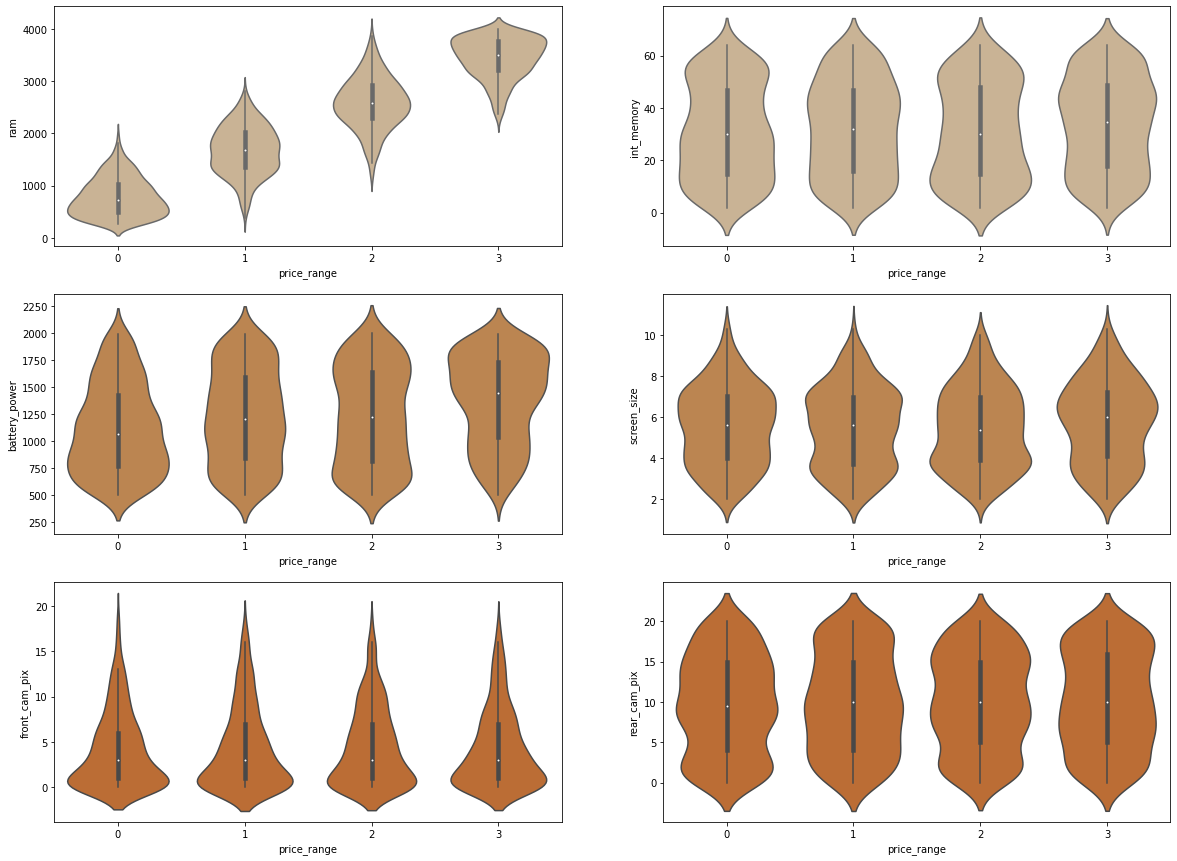

In [59]:
plt.figure(figsize=(20,15))


plt.subplot(3,2,1)
sns.violinplot(x = 'price_range', y = 'ram', data = df, color="tan")
plt.subplot(3,2,2)
sns.violinplot(x = 'price_range', y = 'int_memory', data = df,color="tan")
plt.subplot(3,2,3)
sns.violinplot(x = 'price_range', y = 'battery_power', data = df, color="peru")
plt.subplot(3,2,4)
sns.violinplot(x = 'price_range', y = 'screen_size', data = df, color="peru")
plt.subplot(3,2,5)
sns.violinplot(x = 'price_range', y = 'front_cam_pix', data = df, color="chocolate")
plt.subplot(3,2,6)
sns.violinplot(x = 'price_range', y = 'rear_cam_pix', data = df, color="chocolate")

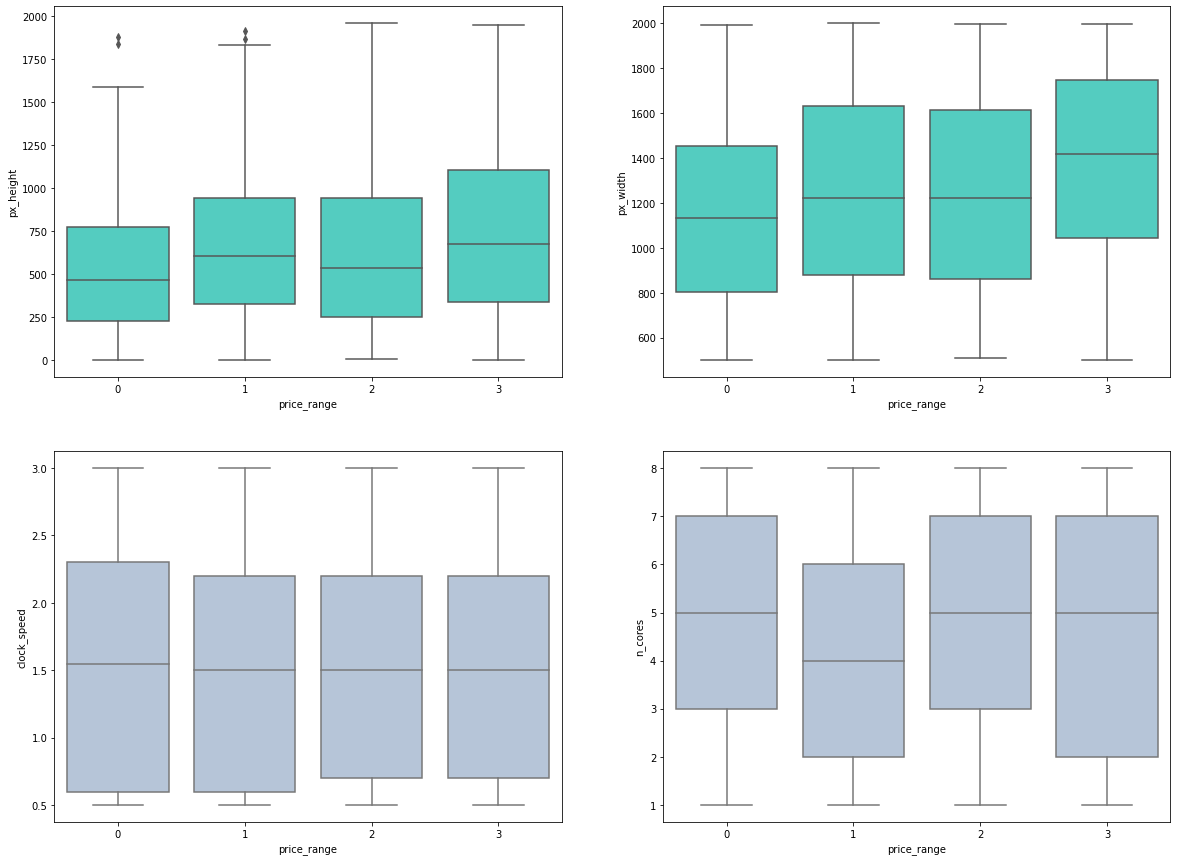

In [60]:
plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x = 'price_range', y = 'px_height', data = df, color="turquoise")
plt.subplot(2,2,2)
sns.boxplot(x = 'price_range', y = 'px_width', data = df, color="turquoise")
plt.subplot(2,2,3)
sns.boxplot(x = 'price_range', y = 'clock_speed', data = df, color="lightsteelblue")
plt.subplot(2,2,4)
sns.boxplot(x = 'price_range', y = 'n_cores', data = df, color="lightsteelblue")

In [61]:
print(binary_features)               

['bluetooth', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'has_front_cam', 'has_rear_cam', 'hd_quality', 'slim_and_light_weight_touch_mob']


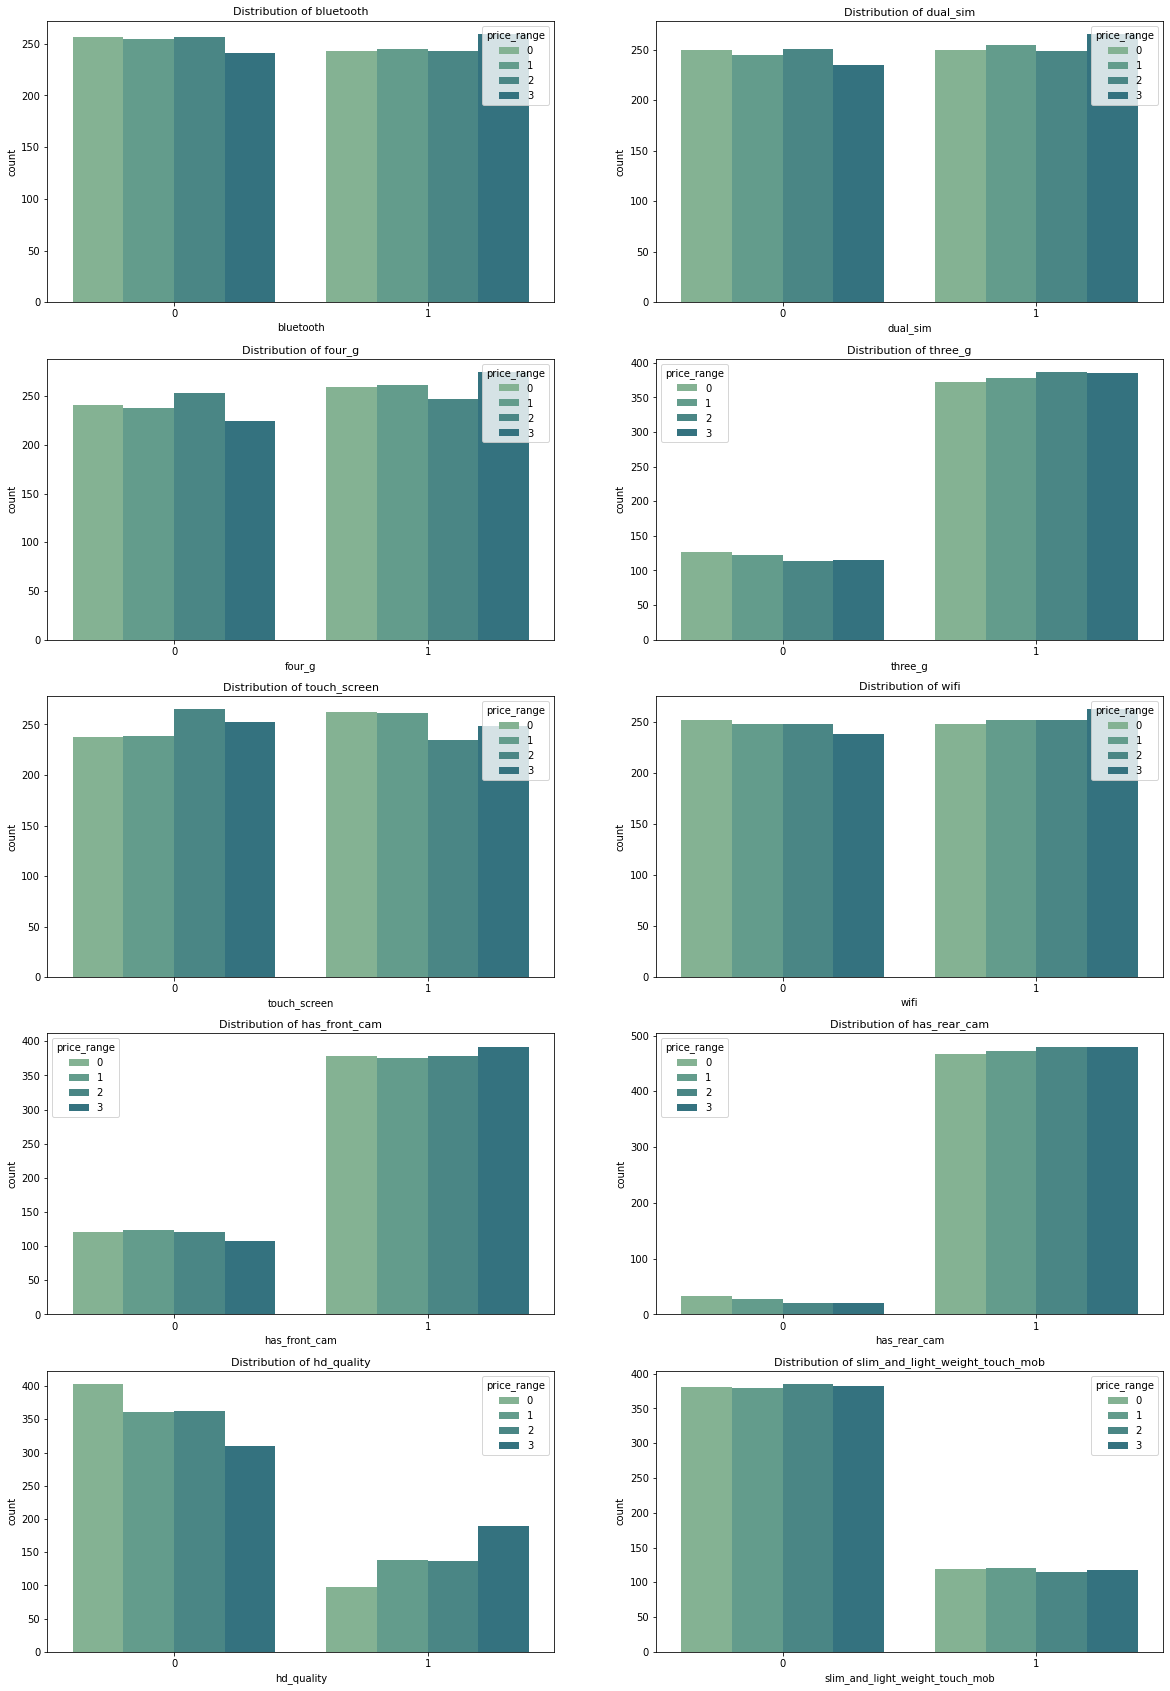

In [62]:
plt.figure(figsize=(20,30))
i = 0
for feature in binary_features:
  plt.subplot(5,2,i+1)
  sns.countplot(df[feature], hue = df['price_range'])

  plt.title(f'Distribution of {binary_features[i]}', color = 'black',fontsize = 11)
  i += 1

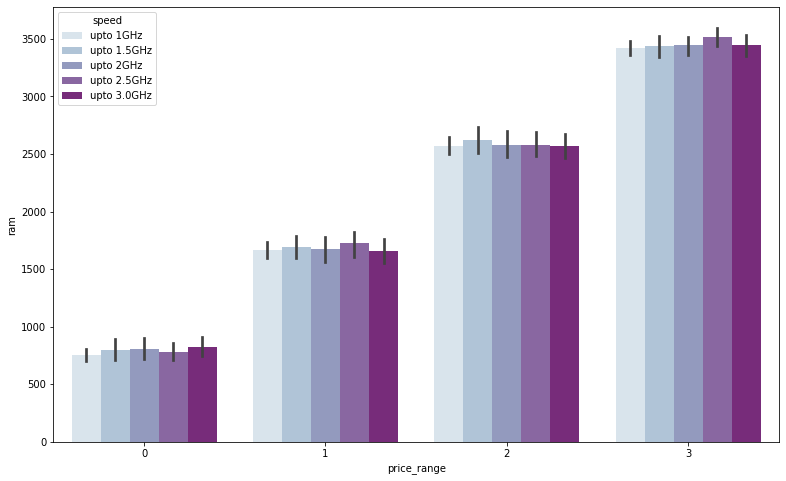

In [63]:
plt.figure(figsize = (13, 8))

sns.barplot(df['price_range'], df['ram'], hue= df['speed'], palette = 'BuPu')

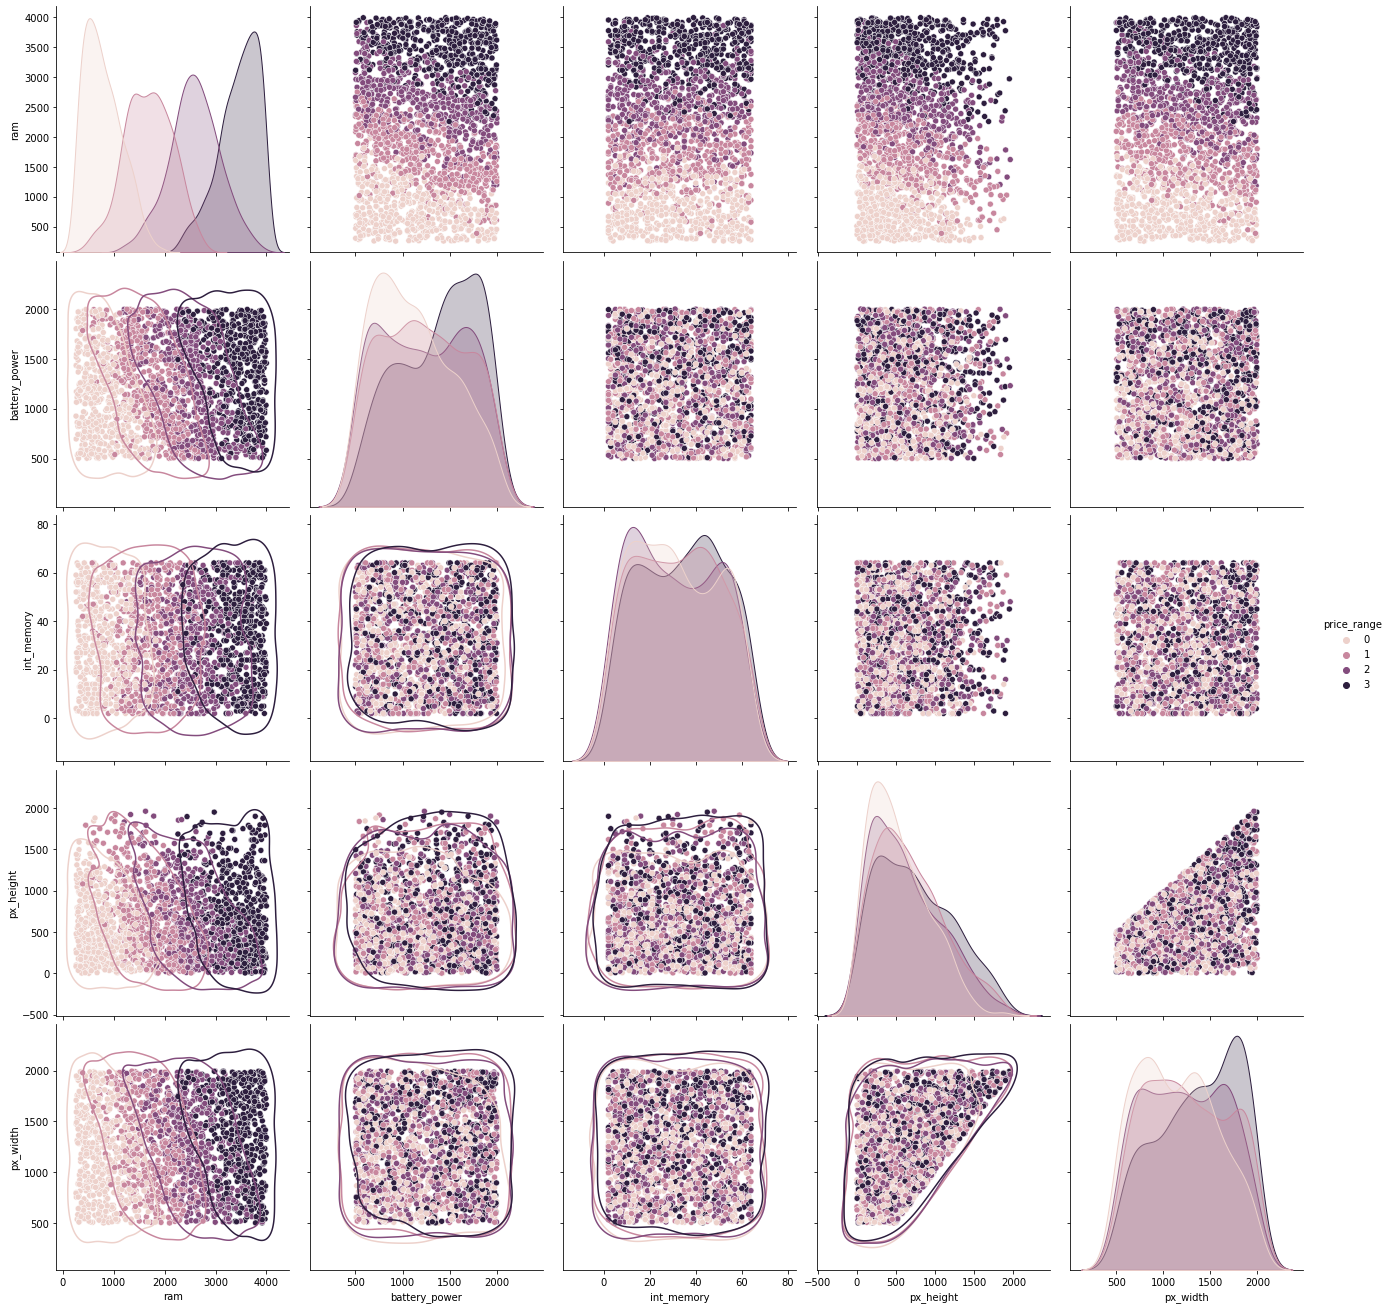

In [64]:
g = sns.pairplot(df,vars=['ram',"battery_power","int_memory","px_height","px_width"],hue="price_range",size=3.7)
g.map_lower(sns.kdeplot, levels=2,color=".2")

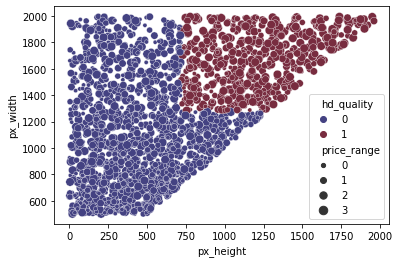

In [65]:
sns.scatterplot(df["px_height"],df["px_width"],hue=df["hd_quality"],size=df["price_range"],palette = 'icefire')

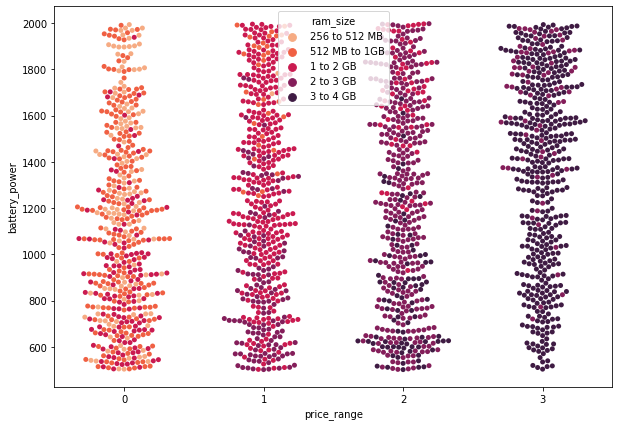

In [66]:
plt.figure(figsize = (10, 7))
sns.swarmplot(df['price_range'], df['battery_power'], hue = df['ram_size'], palette = 'rocket_r')

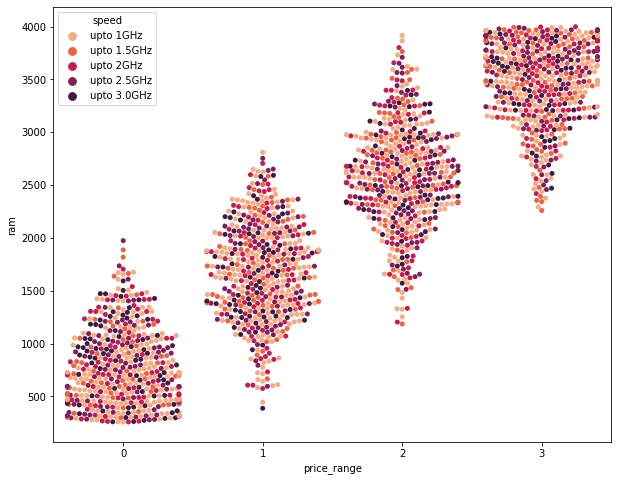

In [67]:
#clock speed and ram

plt.figure(figsize = (10, 8))
sns.swarmplot(df['price_range'], df['ram'], hue = df['speed'], palette = 'rocket_r')

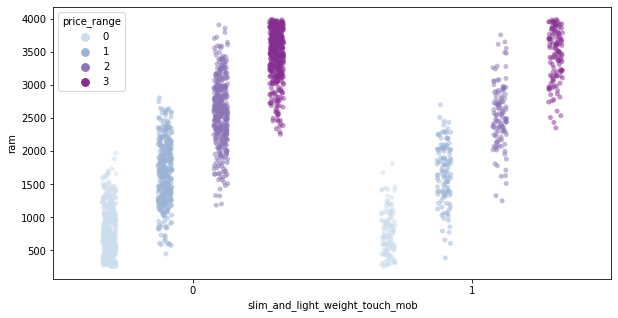

In [68]:
plt.figure(figsize = (10, 5))
sns.stripplot(df['slim_and_light_weight_touch_mob'], df['ram'], hue = df['price_range'], dodge=True, jitter=True, alpha = 0.5, \
             palette = 'BuPu')

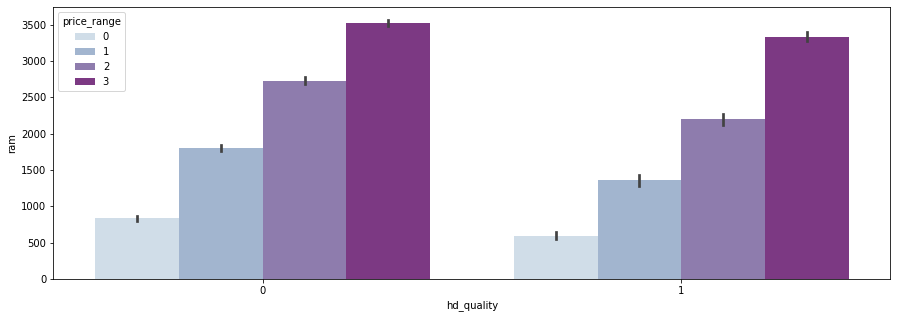

In [69]:
plt.figure(figsize = (15, 5))

sns.barplot(df['hd_quality'], y = df['ram'], hue = df['price_range'], palette = 'BuPu')

In [70]:
df.head()

battery_power  bluetooth  clock_speed  dual_sim  front_cam_pix  four_g  \
0            842          0          2.2         0              1       0   
1           1021          1          0.5         1              0       1   
2            563          1          0.5         1              2       1   
3            615          1          2.5         0              0       0   
4           1821          1          1.2         0             13       1   

   int_memory  mobile_depth  mobile_wt  n_cores  rear_cam_pix  px_height  \
0           7           6.0        188        2             2       20.0   
1          53           7.0        136        3             6      905.0   
2          41           9.0        145        5             6     1263.0   
3          10           8.0        131        6             9     1216.0   
4          44           6.0        141        2            14     1208.0   

   px_width   ram  screen_height  screen_width  talk_time  three_g  \
0       756  2549       3.543307      2.755906         19        0   
1      1988  2631       6.692913      1.181102          7        1   
2      1716  2603       4.330709      0.787402          9        1   
3      1786  2769       6.299213      3.149606         11        1   
4      1212  1411       3.149606      0.787402         15        1   

   touch_screen  wifi  price_range  has_front_cam  has_rear_cam  hd_quality  \
0             0     1            1              1             1           0   
1             1     0            2              0             1           1   
2             1     0            2              1             1           1   
3             0     0            2              0             1           1   
4             1     0            1              1             1           0   

   screen_size  pixel_per_inch   ram_size  slim_and_light_weight_touch_mob  \
0          4.5           168.1  2 to 3 GB                                0   
1          6.8           321.2  2 to 3 GB                                1   
2          4.4           484.2  2 to 3 GB                                0   
3          7.0           308.7  2 to 3 GB                                0   
4          3.2           534.8  1 to 2 GB                                1   

         speed  
0  upto 2.5GHz  
1    upto 1GHz  
2    upto 1GHz  
3  upto 2.5GHz  
4  upto 1.5GHz

In [71]:
# selecting columns for model implementation
df_pre = df.copy()

In [72]:
type(df_pre)

pandas.core.frame.DataFrame

In [73]:
df_pre = df_pre.drop(["px_height","px_width","screen_height","screen_width","ram_size","speed"],axis=1)

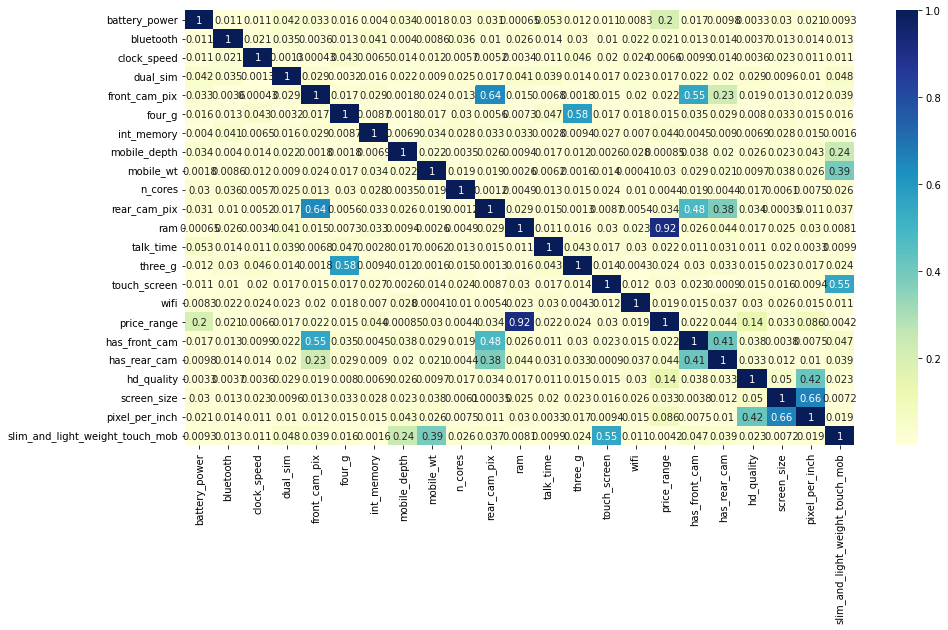

In [74]:
# plotting Heatmap after creating dummies and removing most correlated features
plt.figure(figsize=(15,8))
correlation = df_pre.corr()
sns.heatmap(abs(correlation), annot=True, cmap='YlGnBu')

In [75]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [76]:
feature_selection = calc_vif(df_pre[[i for i in df_pre.describe().columns if i not in ['price_range',"mobile_wt","has_rear_cam","screen_size"]]])
feature_selection

variables       VIF
0                     battery_power  7.613923
1                         bluetooth  1.973097
2                       clock_speed  4.120398
3                          dual_sim  1.992027
4                     front_cam_pix  3.912222
5                            four_g  3.190185
6                        int_memory  3.847799
7                      mobile_depth  4.158310
8                           n_cores  4.452988
9                      rear_cam_pix  6.451620
10                              ram  4.544004
11                        talk_time  4.682319
12                          three_g  6.029692
13                     touch_screen  2.972436
14                             wifi  1.988579
15                    has_front_cam  6.094125
16                       hd_quality  1.701809
17                   pixel_per_inch  4.699838
18  slim_and_light_weight_touch_mob  2.056441

In [77]:
feature_selected_columns = feature_selection["variables"].value_counts().index

In [78]:
X= df_pre[feature_selected_columns]
y = df_pre["price_range"]

In [79]:
print(X.shape)
print(y.shape)

(2000, 19)
(2000,)


In [80]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(1600, 19)
(400, 19)


We've chosen multi_class as multinomial which is unlike OneVsRest but learns a true multinomial logistic regression which gives a better probability estimates, solvers was chosen to be newton-cg which is robust to unscaled dataset and only uses l2 regularization

In [82]:
from sklearn.model_selection import GridSearchCV
penalty=["l1","l2"]
max_iter= [80,100,140]
c_values = [100, 10, 1.0, 0.1, 0.01]

In [83]:
param_grid = dict(max_iter= max_iter,C=c_values, penalty=penalty)
log_reg = LogisticRegression(multi_class='multinomial', solver="newton-cg")
grid = GridSearchCV(estimator= log_reg, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train,y_train)

In [84]:
print(grid_result.best_score_)
print(grid_result.best_estimator_)
print(grid_result.best_params_)

0.8899999999999999
LogisticRegression(max_iter=140, multi_class='multinomial', solver='newton-cg')
{'C': 1.0, 'max_iter': 140, 'penalty': 'l2'}


In [85]:
log_reg = LogisticRegression(multi_class='multinomial', solver="newton-cg",C=1.0 ,max_iter= 140, penalty= "l2")
log_reg = log_reg.fit(X_train,y_train)
log_reg.coef_

array([[-9.91859322e-03, -1.55437322e-02, -9.30464365e-03,
        -4.66115283e+00,  4.77682216e-01,  4.80457694e-01,
         4.50389050e-01, -1.55084003e-02, -5.89768593e-03,
         1.24091353e-02, -4.02797381e-02, -5.96648693e-03,
         5.34137155e-03, -1.38914040e-02, -1.77874986e-04,
        -1.00439321e-01, -9.86709851e-03,  2.09997919e-01,
        -6.38768622e-01],
       [-3.01214338e-03, -4.56145318e-03, -2.26808095e-03,
        -1.61315033e+00,  9.99176916e-02,  2.19841518e-01,
         1.30106718e-01, -5.04968331e-03, -1.87297152e-02,
        -1.66962393e-02, -8.16974775e-02, -9.13176930e-02,
         2.76813956e-02, -5.49491236e-03,  7.09435517e-02,
         1.70006790e-02,  7.66949687e-02, -3.57350381e-02,
         1.47859814e-02],
       [ 3.46725366e-03,  5.50851852e-03,  3.66478356e-03,
         1.37347651e+00, -4.05564755e-01, -3.23836633e-01,
        -3.72896936e-01, -1.15530186e-01,  1.75824032e-03,
         9.44510951e-03,  7.42647534e-03,  3.34036093e-02,
    

In [86]:
y_pred_test_lr = log_reg.predict(X_test)
y_pred_train_lr = log_reg.predict(X_train)

In [87]:
y_pred_prob_test_lr = log_reg.predict_proba(X_test)
y_pred_prob_train_lr = log_reg.predict_proba(X_train)

In [88]:
roc_auc_score(y_test, y_pred_prob_test_lr,multi_class="ovr",average='weighted')

0.9826341993881071

In [89]:
from sklearn import metrics
accur=metrics.accuracy_score(y_pred_test_lr, y_test)
print(accur)

0.875


In [90]:
y_pred_test_lr[:10]

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1])

In [91]:
y_test[:10]

405     3
1190    0
1132    2
731     2
1754    2
1178    0
1533    0
1303    3
1857    3
18      1
Name: price_range, dtype: int64

In [92]:
log_reg.intercept_

array([ 43.46042332,  19.75693713, -12.07032946, -51.14703099])

In [93]:
# Calculating classification metrics on train and test data

#Test Data
lr_test_accuracy = accuracy_score(y_test, y_pred_test_lr)
lr_test_recall = recall_score(y_test, y_pred_test_lr, average='macro')
lr_test_precision = precision_score(y_test, y_pred_test_lr, average='macro')
lr_test_f1_score = f1_score(y_test, y_pred_test_lr, average='macro')
lr_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_lr,multi_class='ovr')

#Train Data
lr_train_accuracy = accuracy_score(y_train, y_pred_train_lr)
lr_train_recall = recall_score(y_train, y_pred_train_lr, average='macro')
lr_train_precision = precision_score(y_train, y_pred_train_lr, average='macro')
lr_train_f1_score = f1_score(y_train, y_pred_train_lr, average='macro')
lr_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_lr, multi_class='ovr')

In [94]:
print("The accuracy on test dataset is", lr_test_accuracy)
print("The recall score on test dataset is", lr_test_recall)
print("The precision on test dataset is", lr_test_precision)
print("The F1 score on test dataset is", lr_test_f1_score)
print("The ROC AUC score on test dataset is", lr_test_roc_auc)

The accuracy on test dataset is 0.875
The recall score on test dataset is 0.8738384994105819
The precision on test dataset is 0.8742568343106228
The F1 score on test dataset is 0.8739624386978182
The ROC AUC score on test dataset is 0.9823979432085597


In [95]:
print("The accuracy on train dataset is", lr_train_accuracy)
print("The recall score on train dataset is", lr_train_recall)
print("The precision on train dataset is", lr_train_precision)
print("The F1 score on train dataset is", lr_train_f1_score)
print("The ROC AUC on train dataset is", lr_train_roc_auc)

The accuracy on train dataset is 0.9
The recall score on train dataset is 0.9002154537774414
The precision on train dataset is 0.8999076603157371
The F1 score on train dataset is 0.900048883665388
The ROC AUC on train dataset is 0.989057226677532


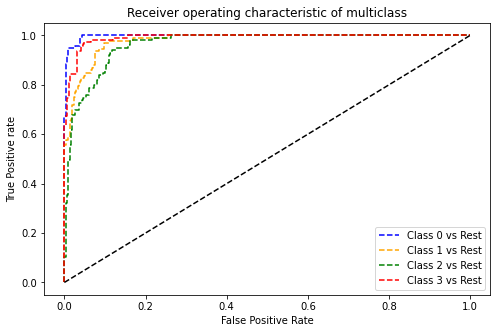

In [96]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_lr[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= "Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= "Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= "Class 2 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= "Class 3 vs Rest")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (LR)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [97]:
from sklearn.metrics import multilabel_confusion_matrix

In [98]:
ml_cm = multilabel_confusion_matrix(y_test, y_pred_test_lr)
print(ml_cm)

[[[302   3]
  [  5  90]]

 [[291  17]
  [ 14  78]]

 [[280  21]
  [ 21  78]]

 [[277   9]
  [ 10 104]]]


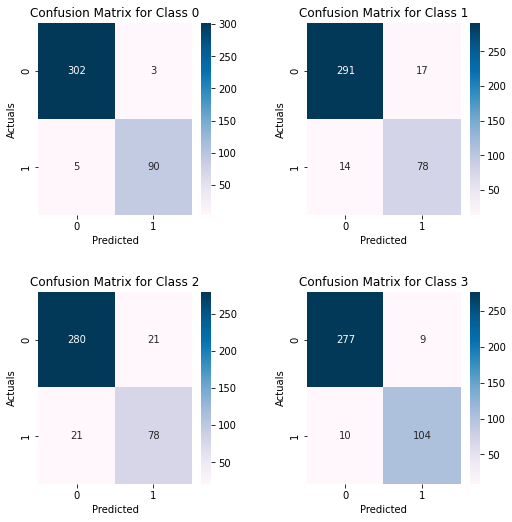

In [491]:
plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm[i], annot=True,fmt="g", ax = ax, cmap= "PuBu")
  
  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)

In [100]:
confusion_matrix(y_train, y_pred_train_lr)

array([[385,  20,   0,   0],
       [ 23, 357,  28,   0],
       [  0,  28, 341,  32],
       [  0,   0,  29, 357]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

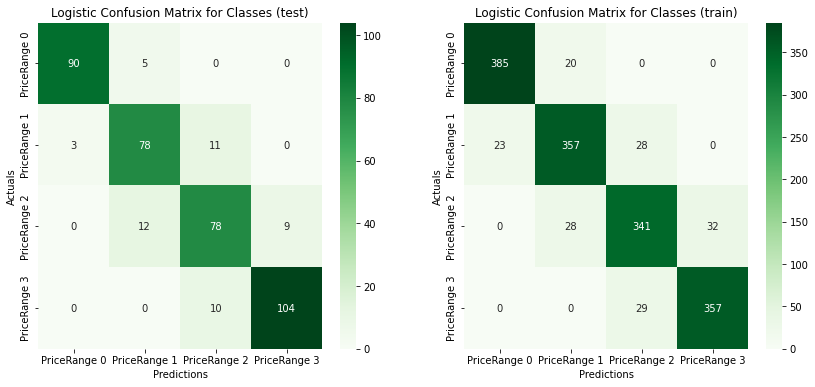

In [492]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm = confusion_matrix(y_test, y_pred_test_lr)
cm1 = confusion_matrix(y_train, y_pred_train_lr)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm, annot=True,fmt="g", ax = ax, cmap= "Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Logistic Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm1, annot=True,fmt="g", ax = ax, cmap= "Greens"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Logistic Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

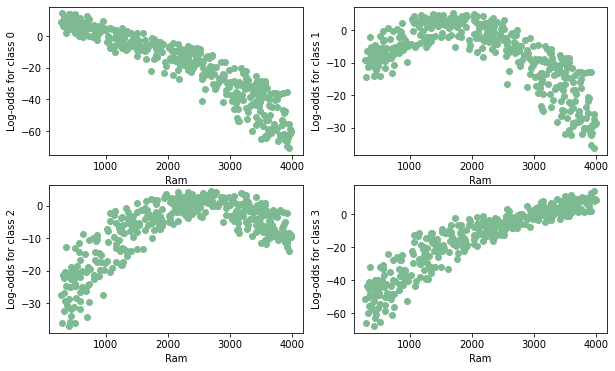

In [123]:
from IPython.core.pylabtools import figsize
from matplotlib import figure
log_odds = np.log(y_pred_prob_test_lr / (1 - y_pred_prob_test_lr))

plt.figure(figsize = (10, 6))
for i in range(0,4):
  plt.subplot(2,2,i+1)
  plt.scatter(x=X_test['ram'].values, y=log_odds[:,i])
  plt.xlabel("Ram")
  plt.ylabel(f"Log-odds for class {i}")


One of the assumptions of logistic regression is that the relationship between the logit (aka log-odds) of the outcome and each continuous independent variable is linear.

From the EDA part we can clearly say ram is one of the continuous variable which is directly dependent to price prediction, so we're picking one variable and checking our assumption, plotting log of odds for different classes vs ram variable, we can interpret that class 1 and 2 are more likely to be non linear, whereas class 0 and 3 have almost linear relationship with ram.

We can clearly see and vistualize that class 0 and 3 have more true positives than class 1 and 2 from our confusion matrix, they also have linear relationship btw log-odds and ram. unlike calss 1 and 2 which has low true positives and clearly violating logistic regression assumption 



In [103]:
log_odds

array([[-43.53474997, -17.49355255,  -4.13199083,   4.13198921],
       [  7.35845707,  -7.35845713, -24.009291  , -48.28161283],
       [-21.01475726,  -5.13438865,   3.63796237,  -3.90333926],
       ...,
       [ 13.13133312, -13.13133312, -34.16736992, -60.76856255],
       [-35.26524026, -13.40420767,  -1.58611002,   1.58609932],
       [  0.39738319,  -0.39751073, -10.39254769, -28.57819302]])

In [104]:
len(log_odds[:,1])

400

In [105]:
y_pred_train_lr

array([0, 1, 3, ..., 3, 0, 1])

In [106]:
y_pred_prob_test_lr

array([[1.23907706e-19, 2.52724094e-08, 1.57973311e-02, 9.84202644e-01],
       [9.99363225e-01, 6.36775050e-04, 3.74022220e-11, 1.07538003e-21],
       [7.47148421e-10, 5.85615511e-03, 9.74368372e-01, 1.97754723e-02],
       ...,
       [9.99998018e-01, 1.98213681e-06, 1.44977225e-15, 4.06021106e-27],
       [4.83616103e-16, 1.50878000e-06, 1.69931894e-01, 8.30066597e-01],
       [5.98058781e-01, 4.01910560e-01, 3.06591825e-05, 3.87836311e-13]])

In [107]:
from sklearn.preprocessing import MinMaxScaler

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [109]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [110]:
knn_cv.best_score_

0.8512500000000001

In [111]:
knn_cv.best_params_

{'n_neighbors': 14}

In [112]:
knn= KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [113]:
#Predicting the test set result  
y_pred_prob_train_knn = knn.predict_proba(X_train)
y_pred_prob_test_knn = knn.predict_proba(X_test)  

In [114]:
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)  

In [115]:
y_test[:10]

405     3
1190    0
1132    2
731     2
1754    2
1178    0
1533    0
1303    3
1857    3
18      1
Name: price_range, dtype: int64

In [116]:
y_pred_test_knn[:10]

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1])

In [133]:
# Calculating classification metrics on train and test data

#Test Data
knn_test_accuracy = accuracy_score(y_test, y_pred_test_knn)
knn_test_recall = recall_score(y_test, y_pred_test_knn, average='macro')
knn_test_precision = precision_score(y_test, y_pred_test_knn, average='macro')
knn_test_f1_score = f1_score(y_test, y_pred_test_knn, average='macro')
knn_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_knn,multi_class='ovr')

#Train Data
knn_train_accuracy = accuracy_score(y_train, y_pred_train_knn)
knn_train_recall = recall_score(y_train, y_pred_train_knn, average='macro')
knn_train_precision = precision_score(y_train, y_pred_train_knn, average='macro')
knn_train_f1_score = f1_score(y_train, y_pred_train_knn, average='macro')
knn_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_knn, multi_class='ovr')

In [139]:
print("The accuracy for KNN in test split is", knn_test_accuracy)
print("The recall score for KNN in test split is", knn_test_recall)
print("The precision for KNN in test split is", knn_test_precision)
print("The F1 score for KNN in test split is", knn_test_f1_score)
print("The ROC AUC score for KNN in test split is", knn_test_roc_auc)

The accuracy for KNN in test split is 0.835
The recall score for KNN in test split is 0.8318430298407415
The precision for KNN in test split is 0.8303891353001771
The F1 score for KNN in test split is 0.8300845036794487
The ROC AUC score for KNN in test split is 0.9666050864163187


In [140]:
print("The accuracy for KNN in train split is", knn_train_accuracy)
print("The recall score for KNN in train split is", knn_train_recall)
print("The precision for KNN in train split is", knn_train_precision)
print("The F1 score for KNN in train split is", knn_train_f1_score)
print("The ROC AUC for KNN in train split is", knn_train_roc_auc)

The accuracy for KNN in train split is 0.856875
The recall score for KNN in train split is 0.8565314009425208
The precision for KNN in train split is 0.8584309579640724
The F1 score for KNN in train split is 0.8567853691238145
The ROC AUC for KNN in train split is 0.9795514927491573


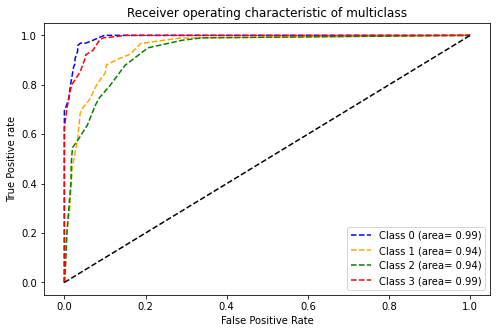

In [117]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_knn[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= "Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= "Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= "Class 2 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= "Class 3 vs Rest")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [450]:
ml_cm_knn = multilabel_confusion_matrix(y_test, y_pred_test_knn)
print(ml_cm_knn)

[[[295  10]
  [  6  89]]

 [[286  22]
  [ 20  72]]

 [[282  19]
  [ 31  68]]

 [[271  15]
  [  9 105]]]


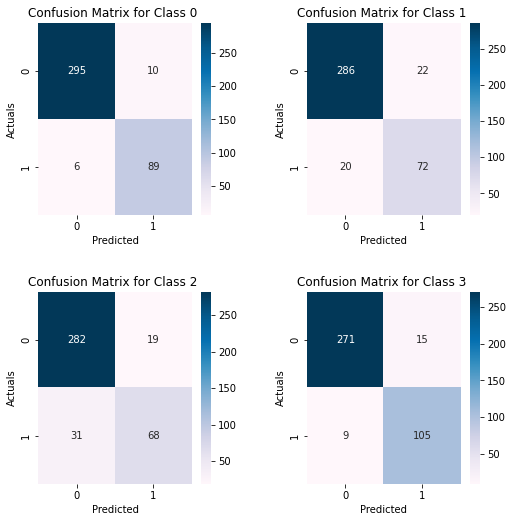

In [489]:
plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_knn[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")

  plt.title(f"Confusion Matrix for Class {i} ")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")

plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)

In [456]:
{confusion_matrix(y_train, y_pred_train_knn)

array([[386,  19,   0,   0],
       [ 43, 344,  21,   0],
       [  0,  56, 317,  28],
       [  0,   0,  62, 324]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

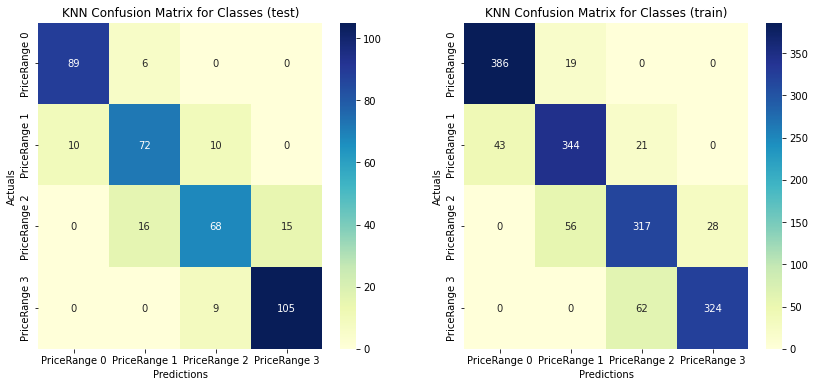

In [493]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_knn_test = confusion_matrix(y_test, y_pred_test_knn)
cm_knn_train = confusion_matrix(y_train, y_pred_train_knn)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_knn_test, annot=True,fmt="g", ax = ax, cmap= "YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('KNN Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_knn_train, annot=True,fmt="g", ax = ax, cmap= "YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('KNN Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [118]:
from sklearn import svm
svm_clf = svm.SVC()

In [119]:
# param_grid = [{'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.0001],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# svm_cv = GridSearchCV(svm_clf, param_grid,n_jobs=2, cv=5, verbose = 10,scoring='accuracy')              

In [120]:
# svm_cv.fit(X_train,y_train)
# Fitting 5 folds for each of 20 candidates, totalling 100 fits
# GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
#              param_grid=[{'C': [1, 10, 100, 1000],
#                           'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
#                          {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
#              scoring='accuracy', verbose=10)

In [121]:
# print(svm_cv.best_params_)
# print(svm_cv.best_score_)
# {'C': 1, 'kernel': 'linear'}
# 0.88375

0.88375

In [128]:
svm_clf = svm.SVC(C=1, kernel="linear", probability= True)
svm_clf.fit(X_train,y_train)

SVC(C=1, kernel='linear', probability=True)

In [129]:
y_pred_train_svm = svm_clf.predict(X_train)
y_pred_test_svm = svm_clf.predict(X_test)

In [130]:
y_pred_train_svm

array([0, 1, 3, ..., 3, 0, 1])

In [131]:
y_pred_prob_train_svm = svm_clf.predict_proba(X_train)
y_pred_prob_test_svm = svm_clf.predict_proba(X_test)

In [142]:
accuracy_score(y_test, y_pred_test_svm)

0.8675

In [295]:
# Calculating classification metrics on train and test data

#Test Data
svm_test_accuracy = accuracy_score(y_test, y_pred_test_svm)
svm_test_recall = recall_score(y_test, y_pred_test_svm, average='macro')
svm_test_precision = precision_score(y_test, y_pred_test_svm, average='macro')
svm_test_f1_score = f1_score(y_test, y_pred_test_svm, average='macro')
svm_test_roc_auc = roc_auc_score(y_test, y_pred_prob_test_svm,multi_class='ovr')

#Train Data
svm_train_accuracy = accuracy_score(y_train, y_pred_train_svm)
svm_train_recall = recall_score(y_train, y_pred_train_svm, average='macro')
svm_train_precision = precision_score(y_train, y_pred_train_svm, average='macro')
svm_train_f1_score = f1_score(y_train, y_pred_train_svm, average='macro')
svm_train_roc_auc = roc_auc_score(y_train, y_pred_prob_train_svm, multi_class='ovr')

In [296]:
print("The accuracy for SVM in test split is", svm_test_accuracy)
print("The recall score for SVM in test split is", svm_test_recall)
print("The precision for SVM in test split is", svm_test_precision)
print("The F1 score for SVM in test split is", svm_test_f1_score)
print("The ROC AUC score for SVM in test split is", svm_test_roc_auc)

The accuracy for SVM in test split is 0.8675
The recall score for SVM in test split is 0.8658241453435961
The precision for SVM in test split is 0.8665402784229155
The F1 score for SVM in test split is 0.8658769594250914
The ROC AUC score for SVM in test split is 0.9796570331256447


In [297]:
print("The accuracy for SVM in train split is", svm_train_accuracy)
print("The recall score for SVM in train split is", svm_train_recall)
print("The precision for SVM in train split is", svm_train_precision)
print("The F1 score for SVM in train split is", svm_train_f1_score)
print("The ROC AUC for SVM in train split is", svm_train_roc_auc)

The accuracy for SVM in train split is 0.905625
The recall score for SVM in train split is 0.905724088072833
The precision for SVM in train split is 0.9052623083199284
The F1 score for SVM in train split is 0.9054338000751732
The ROC AUC for SVM in train split is 0.9880789761267794


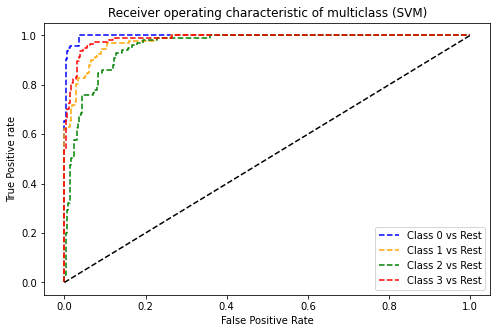

In [461]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob_test_svm[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= "Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= "Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= "Class 2 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= "Class 3 vs Rest")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [463]:
ml_cm_svm = multilabel_confusion_matrix(y_test, y_pred_test_svm)
print(ml_cm_svm)

[[[302   3]
  [  6  89]]

 [[289  19]
  [ 14  78]]

 [[281  20]
  [ 24  75]]

 [[275  11]
  [  9 105]]]


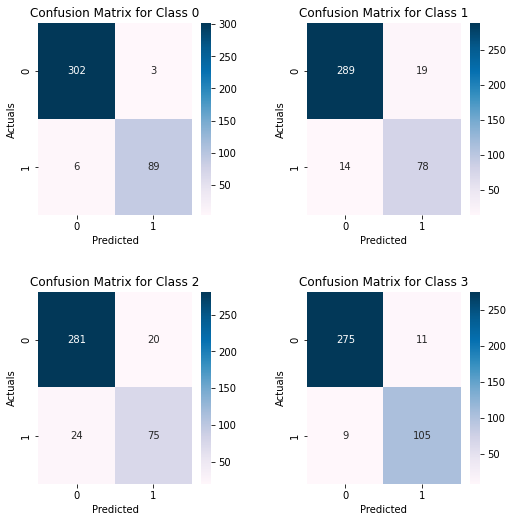

In [486]:

plt.figure(figsize=(8,8))
for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_svm[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")
  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)


In [465]:
confusion_matrix(y_test, y_pred_test_svm)

array([[ 89,   6,   0,   0],
       [  3,  78,  11,   0],
       [  0,  13,  75,  11],
       [  0,   0,   9, 105]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

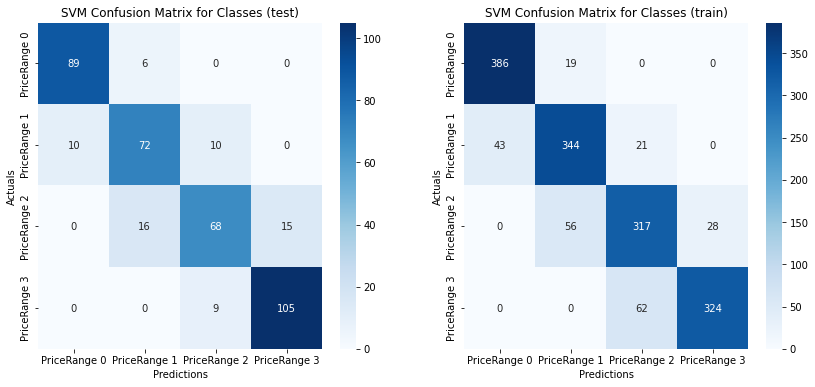

In [494]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_svm_test = confusion_matrix(y_test, y_pred_test_knn)
cm_svm_train = confusion_matrix(y_train, y_pred_train_knn)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_svm_test, annot=True,fmt="g", ax = ax, cmap= "Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('SVM Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_svm_train, annot=True,fmt="g", ax = ax, cmap= "Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('SVM Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [384]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm = train_test_split( X,y , test_size = 0.3, random_state = 0) 
print(X_train_tm.shape)
print(X_test_tm.shape)

(1400, 19)
(600, 19)


In [427]:
# Hyperparameter tuning

xgb_clf_cv = XGBClassifier(objective= "multi:softmax")
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[ 3, 5, 10]}
xgb_clf_cv = GridSearchCV(xgb_clf_cv, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
xgb_clf_cv.fit(X_train_tm, y_train_tm)

GridSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softmax'),
             param_grid={'max_depth': [3, 5, 10],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy')

In [428]:
print(xgb_clf_cv.best_params_)
print(xgb_clf_cv.best_score_)

{'max_depth': 3, 'n_estimators': 100}
0.8707142857142858


In [429]:
y_pred_train_xgb = xgb_clf_cv.predict(X_train_tm)
y_pred_test_xgb = xgb_clf_cv.predict(X_test_tm)

In [430]:
y_pred_prob_train_xgb = xgb_clf_cv.predict_proba(X_train_tm)
y_pred_prob_test_xgb = xgb_clf_cv.predict_proba(X_test_tm)

In [432]:
# Calculating classification metrics on train and test data

#Test Data
xgb_test_accuracy = accuracy_score(y_test_tm, y_pred_test_xgb)
xgb_test_recall = recall_score(y_test_tm, y_pred_test_xgb, average='macro')
xgb_test_precision = precision_score(y_test_tm, y_pred_test_xgb, average='macro')
xgb_test_f1_score = f1_score(y_test_tm, y_pred_test_xgb, average='macro')
xgb_test_roc_auc = roc_auc_score(y_test_tm, y_pred_prob_test_xgb,multi_class='ovr')

#Train Data
xgb_train_accuracy = accuracy_score(y_train_tm, y_pred_train_xgb)
xgb_train_recall = recall_score(y_train_tm, y_pred_train_xgb, average='macro')
xgb_train_precision = precision_score(y_train_tm, y_pred_train_xgb, average='macro')
xgb_train_f1_score = f1_score(y_train_tm, y_pred_train_xgb, average='macro')
xgb_train_roc_auc = roc_auc_score(y_train_tm, y_pred_prob_train_xgb, multi_class='ovr')

In [433]:
print("The accuracy for Xgboost in test split is", xgb_test_accuracy)
print("The recall score for Xgboost in test split is", xgb_test_recall)
print("The precision for Xgboost in test split is", xgb_test_precision)
print("The F1 score for Xgboost in test split is", xgb_test_f1_score)
print("The ROC AUC score for Xgboost in test split is", xgb_test_roc_auc)

The accuracy for Xgboost in test split is 0.8866666666666667
The recall score for Xgboost in test split is 0.8852259645986538
The precision for Xgboost in test split is 0.8845126430245047
The F1 score for Xgboost in test split is 0.8844939709843724
The ROC AUC score for Xgboost in test split is 0.9808162344439801


In [434]:
print("The accuracy for Xgboost in train split is", xgb_train_accuracy)
print("The recall score for Xgboost in train split is", xgb_train_recall)
print("The precision for Xgboost in train split is", xgb_train_precision)
print("The F1 score for Xgboost in train split is", xgb_train_f1_score)
print("The ROC AUC for Xgboost in train split is", xgb_train_roc_auc)

The accuracy for Xgboost in train split is 0.9542857142857143
The recall score for Xgboost in train split is 0.9543255457386419
The precision for Xgboost in train split is 0.95458767764742
The F1 score for Xgboost in train split is 0.9543189324550712
The ROC AUC for Xgboost in train split is 0.9975038153291497


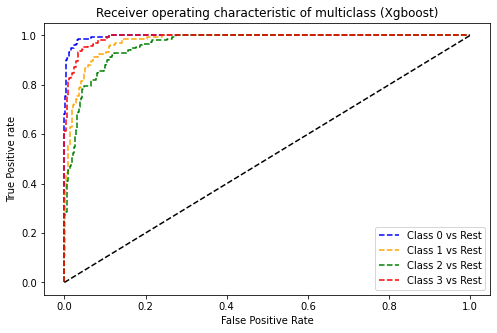

In [468]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_tm, y_pred_prob_test_xgb[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= "Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= "Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= "Class 2 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= "Class 3 vs Rest")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass (Xgboost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [470]:
ml_cm_xgb = multilabel_confusion_matrix(y_test_tm, y_pred_test_xgb)
print(ml_cm_xgb)

[[[441   8]
  [  8 143]]

 [[441  24]
  [ 18 117]]

 [[428  21]
  [ 31 120]]

 [[422  15]
  [ 11 152]]]


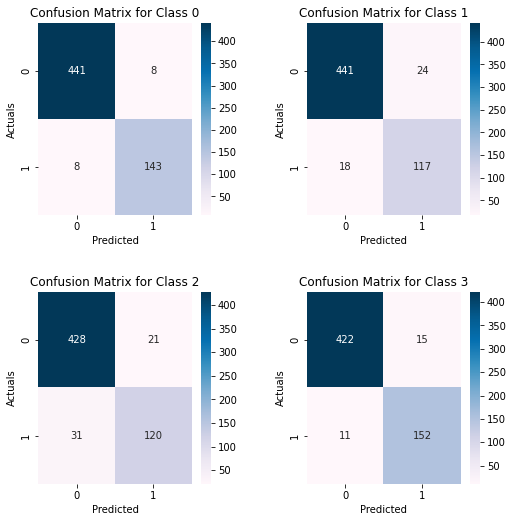

In [474]:
plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_xgb[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")

  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")
  
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)


In [476]:
confusion_matrix(y_test_tm, y_pred_test_xgb)

array([[143,   8,   0,   0],
       [  8, 117,  10,   0],
       [  0,  16, 120,  15],
       [  0,   0,  11, 152]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

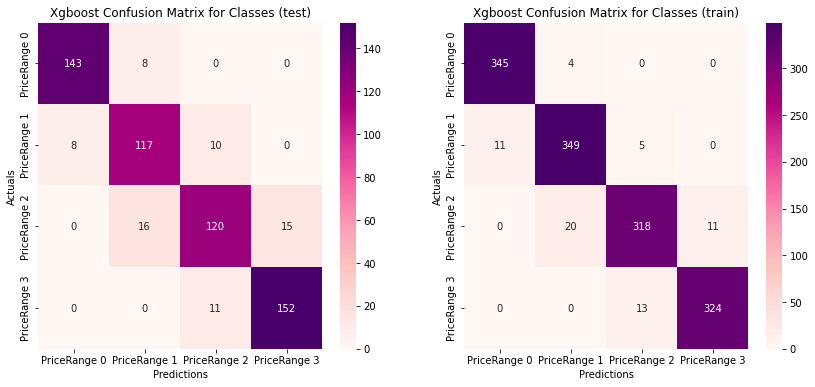

In [499]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_xgb_test = confusion_matrix(y_test_tm, y_pred_test_xgb)
cm_xgb_train = confusion_matrix(y_train_tm, y_pred_train_xgb)

plt.figure(figsize=(14,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_xgb_test, annot=True,fmt="g", ax = ax, cmap= "RdPu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Xgboost Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_xgb_train, annot=True,fmt="g", ax = ax, cmap= "RdPu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('Xgboost Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [440]:
from sklearn.ensemble import BaggingClassifier

In [435]:
bgclassifier = BaggingClassifier(base_estimator=log_reg, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

In [436]:
bgclassifier.fit(X_train_tm, y_train_tm)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=140,
                                                    multi_class='multinomial',
                                                    solver='newton-cg'),
                  max_features=10, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

In [442]:
y_pred_train_bg = bgclassifier.predict(X_train_tm)
y_pred_test_bg = bgclassifier.predict(X_test_tm)

In [441]:
y_pred_prob_train_bg = bgclassifier.predict_proba(X_train_tm)
y_pred_prob_test_bg = bgclassifier.predict_proba(X_test_tm)

In [443]:
# Calculating classification metrics on train and test data

#Test Data
bg_test_accuracy = accuracy_score(y_test_tm, y_pred_test_bg)
bg_test_recall = recall_score(y_test_tm, y_pred_test_bg, average='macro')
bg_test_precision = precision_score(y_test_tm, y_pred_test_bg, average='macro')
bg_test_f1_score = f1_score(y_test_tm, y_pred_test_bg, average='macro')
bg_test_roc_auc = roc_auc_score(y_test_tm, y_pred_prob_test_bg,multi_class='ovr')

#Train Data
bg_train_accuracy = accuracy_score(y_train_tm, y_pred_train_bg)
bg_train_recall = recall_score(y_train_tm, y_pred_train_bg, average='macro')
bg_train_precision = precision_score(y_train_tm, y_pred_train_bg, average='macro')
bg_train_f1_score = f1_score(y_train_tm, y_pred_train_bg, average='macro')
bg_train_roc_auc = roc_auc_score(y_train_tm, y_pred_prob_train_bg, multi_class='ovr')

In [446]:
print("The accuracy for BaggingClassifier in test split is", bg_test_accuracy)
print("The recall score for BaggingClassifier in test split is", bg_test_recall)
print("The precision for BaggingClassifier in test split is", bg_test_precision)
print("The F1 score for BaggingClassifier in test split is", bg_test_f1_score)
print("The ROC AUC score for BaggingClassifier in test split is", bg_test_roc_auc)

The accuracy for BaggingClassifier in test split is 0.8533333333333334
The recall score for BaggingClassifier in test split is 0.8500768187844123
The precision for BaggingClassifier in test split is 0.8498667519890865
The F1 score for BaggingClassifier in test split is 0.849398219106349
The ROC AUC score for BaggingClassifier in test split is 0.9705930366573522


In [447]:
print("The accuracy for BaggingClassifier in train split is", bg_train_accuracy)
print("The recall score for BaggingClassifier in train split is", bg_train_recall)
print("The precision for BaggingClassifier in train split is", bg_train_precision)
print("The F1 score for BaggingClassifier in train split is", bg_train_f1_score)
print("The ROC AUC for BaggingClassifier in train split is", bg_train_roc_auc)

The accuracy for BaggingClassifier in train split is 0.8521428571428571
The recall score for BaggingClassifier in train split is 0.8529224707128057
The precision for BaggingClassifier in train split is 0.852352402706116
The F1 score for BaggingClassifier in train split is 0.8525614340484737
The ROC AUC for BaggingClassifier in train split is 0.9741569563911705


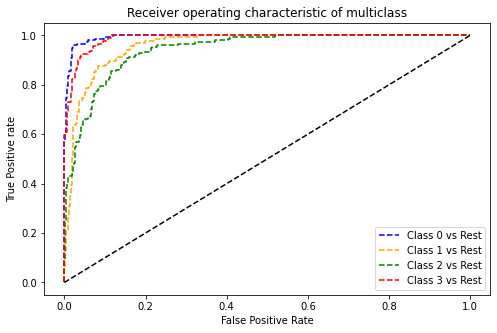

In [477]:
fpr = {}
tpr = {}
thresh = {}
roc_auc= {}
n_class= 4

for i in range(n_class):
  fpr[i], tpr[i], thresh[i] = roc_curve(y_test_tm, y_pred_prob_test_bg[:,i], pos_label=i )
  roc_auc[i] = (auc(fpr[i], tpr[i])).round(2)

plt.figure(figsize = (8, 5))
plt.plot(fpr[0], tpr[0], linestyle="--", color="blue", label= "Class 0 vs Rest")
plt.plot(fpr[1], tpr[1], linestyle="--", color="orange", label= "Class 1 vs Rest")
plt.plot(fpr[2], tpr[2], linestyle="--", color="green", label= "Class 2 vs Rest")
plt.plot(fpr[3], tpr[3], linestyle="--", color="red", label= "Class 3 vs Rest")
plt.plot([0, 1], [0, 1], "k--")
plt.title('Receiver operating characteristic of multiclass')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

In [478]:
ml_cm_bg = multilabel_confusion_matrix(y_test_tm, y_pred_test_bg)
print(ml_cm_bg)

[[[438  11]
  [  7 144]]

 [[441  24]
  [ 29 106]]

 [[419  30]
  [ 40 111]]

 [[414  23]
  [ 12 151]]]


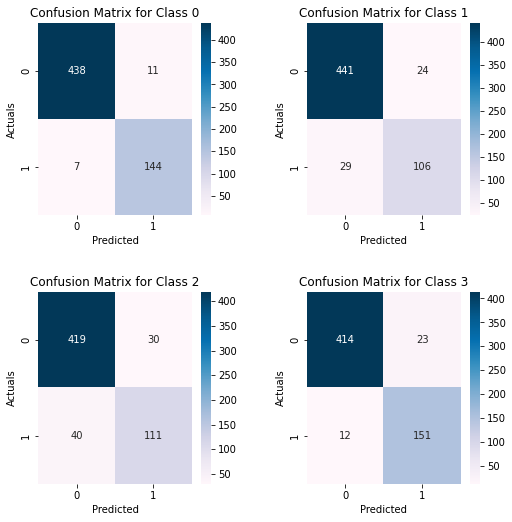

In [479]:
plt.figure(figsize=(8,8))

for i in range(0,4):
  ax= plt.subplot(2,2,i+1)
  sns.heatmap(ml_cm_bg[i], annot=True, fmt="g", ax = ax, cmap= "PuBu")
  plt.title(f"Confusion Matrix for Class {i}")
  plt.xlabel("Predicted")
  plt.ylabel("Actuals")
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9,  wspace=0.4, hspace=0.4)


In [480]:
confusion_matrix(y_test_tm, y_pred_test_bg)

array([[144,   7,   0,   0],
       [ 11, 106,  18,   0],
       [  0,  17, 111,  23],
       [  0,   0,  12, 151]])

[Text(0, 0.5, 'PriceRange 0'),
 Text(0, 1.5, 'PriceRange 1'),
 Text(0, 2.5, 'PriceRange 2'),
 Text(0, 3.5, 'PriceRange 3')]

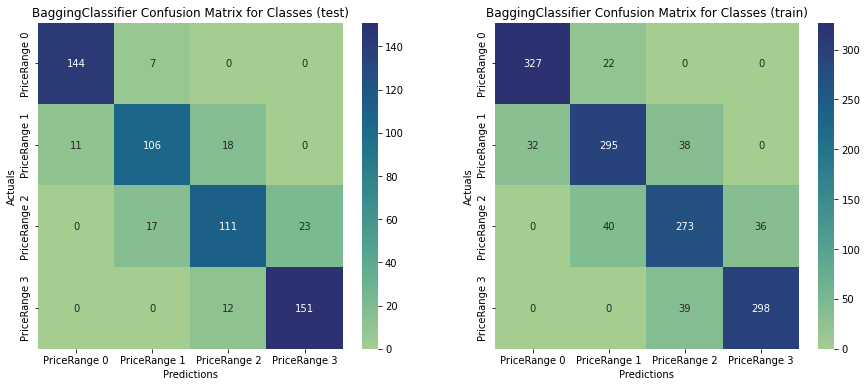

In [503]:
# Get the confusion matrix for both train and test

labels = ['PriceRange 0', 'PriceRange 1','PriceRange 2','PriceRange 3']
cm_bg_test = confusion_matrix(y_test_tm, y_pred_test_bg)
cm_bg_train = confusion_matrix(y_train_tm, y_pred_train_bg)

plt.figure(figsize=(15,6))
ax= plt.subplot(1,2,1)
sns.heatmap(cm_bg_test, annot=True,fmt="g", ax = ax, cmap= "crest"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('BaggingClassifier Confusion Matrix for Classes (test)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

ax= plt.subplot(1,2,2)
sns.heatmap(cm_bg_train, annot=True,fmt="g", ax = ax, cmap= "crest"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predictions')
ax.set_ylabel('Actuals')
ax.set_title('BaggingClassifier Confusion Matrix for Classes (train)')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)